# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Ilya Fradlin, 441264
    
    2. Amrita Bhattacherjee, 441338
    
    3. Mahmoud Mohamamdi, 396222

## Question 1: Preprocessing (20 points)

In [3]:
import pandas as pd
### Seaborn
import seaborn as sns

### Matplotlib
import matplotlib.pyplot as plt

### NumPy
import numpy as np

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

###
from unicodedata import category

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)**
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [66]:
# your code
df = pd.read_csv("datasets/ski_resorts.csv", index_col=0)
# Making sure the indexes and the resort names are unique
unique_values = df.index.is_unique and df["Resort"].is_unique
print(f"The values in the provided dataset are unique: {unique_values}. Meaning the provided data is clean (in this regard) and we can use it as is.")

The values in the provided dataset are unique: True. Meaning the provided data is clean (in this regard) and we can use it as is.


#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [67]:
# your code
display(df.dtypes)
display(df.head(5))

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object

Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
1                 81             4.0         115       Yes       No   
2                 77            33.0         210       Yes      Yes   
3                  0             1.0           2        No       No   
4                 33             3.0          51       Yes      Yes   
5                 26            21.0          77       Yes       No   

   SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1          22.0          16          11.0          49       75398.0   
2          37.0          28           7.0          72       99017.0   
3           2.0           0           0.0           2        1932.0   
4          25.0           8           3.0          36       32938.0   
5           6.0          11          10.0          27       49228.0   

   SnowCannons  
1        600.0  
2       1032.0  
3          0.0  
4        163.0  
5        450.0

**Your Answer:**
TODO

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [68]:
# your code
df['Country'] = df['Country'].astype('category')
df.dtypes

Resort                 object
Country              category
HighestPoint          float64
LowestPoint           float64
DayPassPriceAdult     float64
BeginnerSlope         float64
IntermediateSlope       int64
DifficultSlope        float64
TotalSlope              int64
Snowparks              object
NightSki               object
SurfaceLifts          float64
ChairLifts              int64
GondolaLifts          float64
TotalLifts              int64
LiftCapacity          float64
SnowCannons           float64
dtype: object

**Your Answer:**
TODO

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [69]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)
number_of_entries =df.shape[0]*df.shape[1]
print(f"The number of entries is: {number_of_entries}")


The number of entries is: 6392


In [70]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
num_missing_val = df.isna().sum().sum()
ratio = num_missing_val / number_of_entries
print(f'Total number of NAN values: {num_missing_val}, and the required ratio is {ratio}')


Total number of NAN values: 87, and the required ratio is 0.013610763454317897


In [71]:
# your code for 3. How many rows have at least a single missing value?
num_missing_row = df.shape[0] - df.dropna().shape[0]
print(f"The number of rows containing missing values is: {num_missing_row}")

The number of rows containing missing values is: 45


In [72]:
# your code for 4. Count the number of missing values per column.
display(df.isna().sum())

Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64

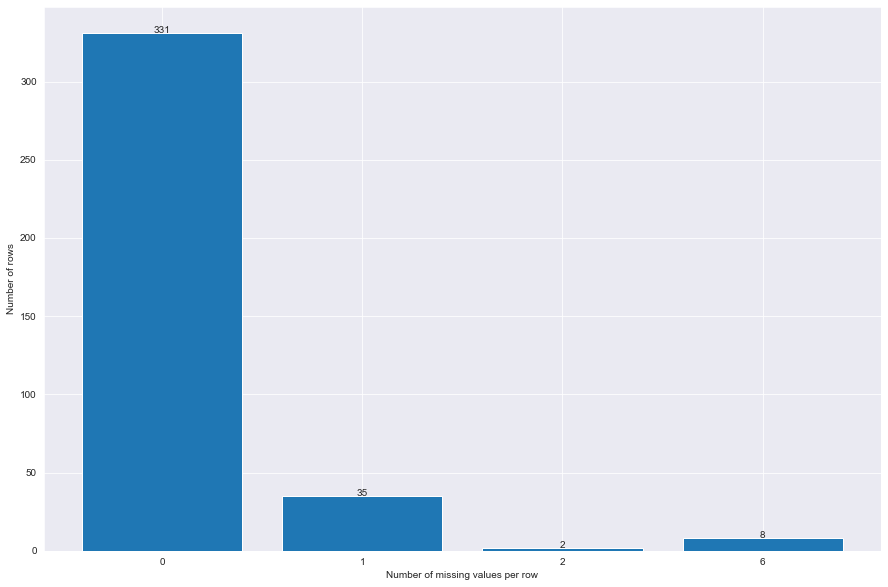

In [73]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

missing_val_per_row = df.isna().sum(axis=1)
unique_elements, counts_elements = np.unique(missing_val_per_row, return_counts=True)
np.array(counts_elements)
unique_elements = np.array(unique_elements).astype(str)

plt.xlabel("Number of missing values per row")
plt.ylabel("Number of rows")
plt.bar(unique_elements, counts_elements)
addlabels(unique_elements, counts_elements)
plt.gcf().set_size_inches(15,10)

In [74]:
display(df.isna().value_counts())

Resort  Country  HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  NightSki  SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  SnowCannons
False   False    False         False        False              False          False              False           False       False      False     False         False       False         False       False         False          331
                                                                                                                                                                                                      True          False            8
                                            True               False          False              False           False       False      False     False         False       False         False       False         False            8
                 True          False        True               True           False

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*
TODO

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [75]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format.
df['country-tmp'] = df['Country']
df = pd.get_dummies(df,prefix="Country", columns=["country-tmp"])

In [76]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
df.Snowparks.replace(('Yes', 'No'), (True, False), inplace=True)
df.NightSki.replace(('Yes', 'No'), (True, False), inplace=True)

In [77]:
# use df.dtypes to check if you correctly transform the data
display(df.dtypes)
display(df.head())

Resort                              object
Country                           category
HighestPoint                       float64
LowestPoint                        float64
DayPassPriceAdult                  float64
BeginnerSlope                      float64
IntermediateSlope                    int64
DifficultSlope                     float64
TotalSlope                           int64
Snowparks                             bool
NightSki                              bool
SurfaceLifts                       float64
ChairLifts                           int64
GondolaLifts                       float64
TotalLifts                           int64
LiftCapacity                       float64
SnowCannons                        float64
Country_Andorra                      uint8
Country_Austria                      uint8
Country_Bosnia and Herzegovina       uint8
Country_Bulgaria                     uint8
Country_Czech Republic               uint8
Country_Denmark                      uint8
Country_Fin

Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  ...  \
1                 81             4.0         115       True  ...   
2                 77            33.0         210       True  ...   
3                  0             1.0           2      False  ...   
4                 33             3.0          51       True  ...   
5                 26            21.0          77       True  ...   

   Country_Serbia  Country_Siberia  Country_Slovakia  Country_Slovenia  \
1               0                0                 0                 0   
2               0                0                 0                 0   
3               0                0                 0                 0   
4               0                0                 0                 0   
5               0                0                 0                 0   

   Country_Southern Russia  Country_Spain  Country_Sweden  \
1                        0              0               0   
2                        0              0               0   
3                        0              0               0   
4                        0              0               0   
5                        1              0               0   

   Country_Switzerland  Country_Ukraine  Country_United Kingdom  
1                    0                0                       0  
2                    0                0                       0  
3                    0                0                       0  
4                    0                0                       0  
5                    0                0                       0  

[5 rows x 44 columns]

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)*

Since the value of 'TotalLifts' is nothing but the sum of 'SurfaceLifts', 'GondolaLifts' and 'Chairlifts', We can use the values of the  other 3 columns to calculate the exact number of the missing value. Before using this "formula" we will first check that we don't have dual NAN values for the same rows in those columns.


In [78]:
# your code
# First we will look at the missing values for the two columns
display(df[df['SurfaceLifts'].isna()][['Resort', 'SurfaceLifts', 'GondolaLifts', 'ChairLifts', 'TotalLifts']])
display(df[df['GondolaLifts'].isna()][['Resort', 'SurfaceLifts', 'GondolaLifts', 'ChairLifts', 'TotalLifts']])

# Then we calculate the missing values using the 'formula' explained in the text above
df['SurfaceLifts'].fillna(df.TotalLifts - df.ChairLifts -df.GondolaLifts, inplace=True)
df['GondolaLifts'].fillna(df.TotalLifts - df.ChairLifts -df.SurfaceLifts, inplace=True)

# Checking if we filled up all the missing values in 'GondolaLifts' and 'SurfaceLifts'
df.isna().sum()[['SurfaceLifts', 'GondolaLifts']]

Resort  SurfaceLifts  GondolaLifts  \
23                       Kicking Horse           NaN           4.0   
50           Valberg-​Beuil les Launes           NaN           0.0   
119                             Aprica           NaN           2.0   
204             Sudelfeld-Bayrischzell           NaN           0.0   
275  Ski Juwel Alpbachtal Wildschönau           NaN           8.0   
372          Montgenèvre (Via Lattea)           NaN           7.0   

     ChairLifts  TotalLifts  
23           13          38  
50            7          29  
119           4          16  
204           5          15  
275           7          47  
372          35          71

Resort  SurfaceLifts  GondolaLifts  \
105                 Lauchernalp-Lötschental           2.0           NaN   
126                             Mythenregion          11.0           NaN   
189               Riesneralm-Donnersbachwald           5.0           NaN   
201                    Geißkopf-Bischofsmais           8.0           NaN   
208                     Nebelhorn-Oberstdorf           3.0           NaN   
250                       Tatranská Lomnica           3.0           NaN   
298  Balme-​Les Autannes-Vallorcine-​Le Tour           8.0           NaN   

     ChairLifts  TotalLifts  
105           2           6  
126           0          15  
189           3           8  
201           1           9  
208           2           8  
250           1           4  
298           2          12

SurfaceLifts    0
GondolaLifts    0
dtype: int64

#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [82]:
# your code for step 1 & 2
df_tmp = df.copy().select_dtypes(['float64', 'int64'])

In [84]:
# your code for step 3
numerical_preprocessor = StandardScaler()
numerical_preprocessor.fit(df_tmp)
transformed_array = numerical_preprocessor.transform(df_tmp)

# Converting the transformed data back to a DataFrame
df_tmp_transformed = pd.DataFrame(transformed_array, index=df_tmp.index, columns=df_tmp.columns)
display(df_tmp_transformed)

HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1       -0.156242    -0.745407           0.902429      -0.123165   
2        0.747618     1.546190           0.472985       1.173947   
3       -1.320303    -0.367412          -0.987121      -0.660540   
4       -0.649256    -0.650908           0.043542      -0.401118   
5        0.309383    -0.272913          -1.674230      -0.123165   
..            ...          ...                ...            ...   
372      0.896891     0.747675           0.558874       1.099826   
373      0.896891     0.747675           0.558874       1.099826   
374      1.617240     0.369679           0.129431      -0.252876   
375      1.617240     0.369679           0.129431      -0.252876   
376      0.128611    -0.131165           0.902429      -0.252876   

     IntermediateSlope  DifficultSlope  TotalSlope  SurfaceLifts  ChairLifts  \
1             0.859478       -0.449353    0.253036      0.578231    0.529440   
2             0.778873        1.173488    1.089385      1.618492    1.483447   
3            -0.772764       -0.617233   -0.741780     -0.808785   -0.742569   
4            -0.107776       -0.505313   -0.310400      0.786283   -0.106565   
5            -0.248834        0.501967   -0.081504     -0.531382    0.131937   
..                 ...             ...         ...           ...         ...   
372           3.660485        4.027449    2.762084      1.063686    2.039951   
373           3.660485        4.027449    2.762084      1.063686    2.039951   
374           1.121442        0.166207    0.402698     -0.323330   -0.027064   
375           1.121442        0.166207    0.402698     -0.323330   -0.027064   
376          -0.450346       -0.449353   -0.372026     -0.323330   -0.265566   

     GondolaLifts  TotalLifts  LiftCapacity  SnowCannons  
1        1.074510    0.711104      0.854103     0.920464  
2        0.464445    1.453096      1.362941     1.975486  
3       -0.603170   -0.805140     -0.728620    -0.544845  
4       -0.145621    0.291717     -0.060639    -0.146770  
5        0.921994    0.001373      0.290307     0.554136  
..            ...         ...           ...          ...  
372      0.464445    1.420835      1.307273    -0.544845  
373      0.464445    1.420835      1.307273    -0.544845  
374      1.227026    0.098154     -0.081191     1.054784  
375      1.227026    0.098154     -0.081191     1.054784  
376      0.006896   -0.256711     -0.210367    -0.268879  

[376 rows x 13 columns]

In [85]:
# your code for step 4
# Displaying all the rows with at least one missing value
display(df_tmp_transformed[df_tmp.isna().any(axis=1)])

# Calculating the missing value using knn impute
knn_imputer = KNNImputer(missing_values=np.NaN, n_neighbors=6, copy=False)
knn_imputer.fit_transform(df_tmp_transformed)

# Making sure there are no more missing values (self-check)
assert df_tmp_transformed.isna().sum().sum() == 0

HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
10      -0.840984    -1.217901                NaN      -0.456708   
19            NaN    -0.854081           0.472985       1.822503   
76      -1.957113    -1.489586           0.816540      -0.493769   
79       0.898261     0.695700          -1.073010      -0.364058   
92       0.583279     1.286318                NaN      -0.197286   
117     -0.758815    -1.147027                NaN      -0.530829   
119      0.240908     0.251556          -0.300012      -0.160226   
122           NaN     0.093270          -0.042346      -0.197286   
123     -0.662951    -0.313075          -1.502453      -0.123165   
151           NaN     1.333568          -1.158898      -0.364058   
172      0.281993     1.286318                NaN      -0.345527   
187     -0.128852     1.286318                NaN      -0.475239   
204     -0.727317    -0.485535                NaN      -0.586420   
217           NaN    -2.304638                NaN            NaN   
218           NaN    -2.470011                NaN            NaN   
219           NaN    -2.375512                NaN            NaN   
220           NaN    -2.446386                NaN            NaN   
221           NaN    -2.493636                NaN            NaN   
222           NaN    -2.323538                NaN            NaN   
223           NaN    -2.446386                NaN            NaN   
229     -1.694173    -1.206089          -1.073010      -0.586420   
238           NaN     0.813824          -1.416564      -0.623480   
242           NaN     1.876936          -2.103673      -0.604950   
243      0.336772     0.742950           0.472985      -0.456708   
247     -1.295653    -0.603659           0.129431      -0.438178   
251     -1.357279          NaN          -0.557678      -0.604950   
260      1.262544          NaN           1.074206      -0.512299   
267      0.509327    -0.131165                NaN       5.065284   
268      0.509327    -0.131165                NaN       5.065284   
293      0.561368    -0.674533           0.730651       0.432740   
307     -0.868374     0.341330           0.043542      -0.642010   
335      0.905108          NaN           0.387097      -0.382588   
342           NaN    -2.415674                NaN            NaN   
343      0.002618    -0.532785                NaN       1.915154   

     IntermediateSlope  DifficultSlope  TotalSlope  SurfaceLifts  ChairLifts  \
10           -0.571252       -0.617233   -0.556903     -0.739434   -0.504068   
19            1.141594        1.285408    1.573587      1.410440    1.562948   
76           -0.007021        0.278127   -0.187148     -0.323330   -0.106565   
79            0.093735       -0.393393   -0.187148     -0.462031   -0.345066   
92           -0.268985       -0.169553   -0.231167     -0.253979   -0.265566   
117          -0.067474       -0.337433   -0.319204     -0.600733   -0.106565   
119          -0.490648       -0.281473   -0.319204     -0.253979   -0.424567   
122          -0.430194       -0.281473   -0.319204     -0.531382   -0.424567   
123          -0.430194       -0.505313   -0.319204      0.924984   -0.265566   
151          -0.651857       -0.393393   -0.504081     -0.531382   -0.186065   
172          -0.470497       -0.505313   -0.442455     -0.323330   -0.504068   
187          -0.591403       -0.505313   -0.556903     -0.531382   -0.504068   
204          -0.289137       -0.505313   -0.477670     -0.253979   -0.345066   
217          -0.772764             NaN   -0.759388     -0.947487   -0.742569   
218          -0.752612             NaN   -0.732977     -0.947487   -0.742569   
219          -0.772764             NaN   -0.759388     -0.947487   -0.742569   
220          -0.772764             NaN   -0.759388     -0.947487   -0.742569   
221          -0.772764             NaN   -0.759388     -0.947487   -0.742569   
222          -0.772764             NaN   -0.759388     -0.947487   -0.742569   
223          -0.772764  

In [87]:
# your code for step 5
rescaled_array = numerical_preprocessor.inverse_transform(df_tmp_transformed)

# Converting the rescaled data back to a DataFrame
df_tmp_rescaled = pd.DataFrame(rescaled_array, index=df_tmp_transformed.index, columns=df_tmp_transformed.columns)

In [90]:
# your code for step 6
#Instead of appending the columns, we will replace the numerical columns in the original dataframe with the updated once
numerical_column_names = list(df_tmp.columns)
df[numerical_column_names] = df_tmp_rescaled[numerical_column_names]

In [91]:
assert df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [92]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


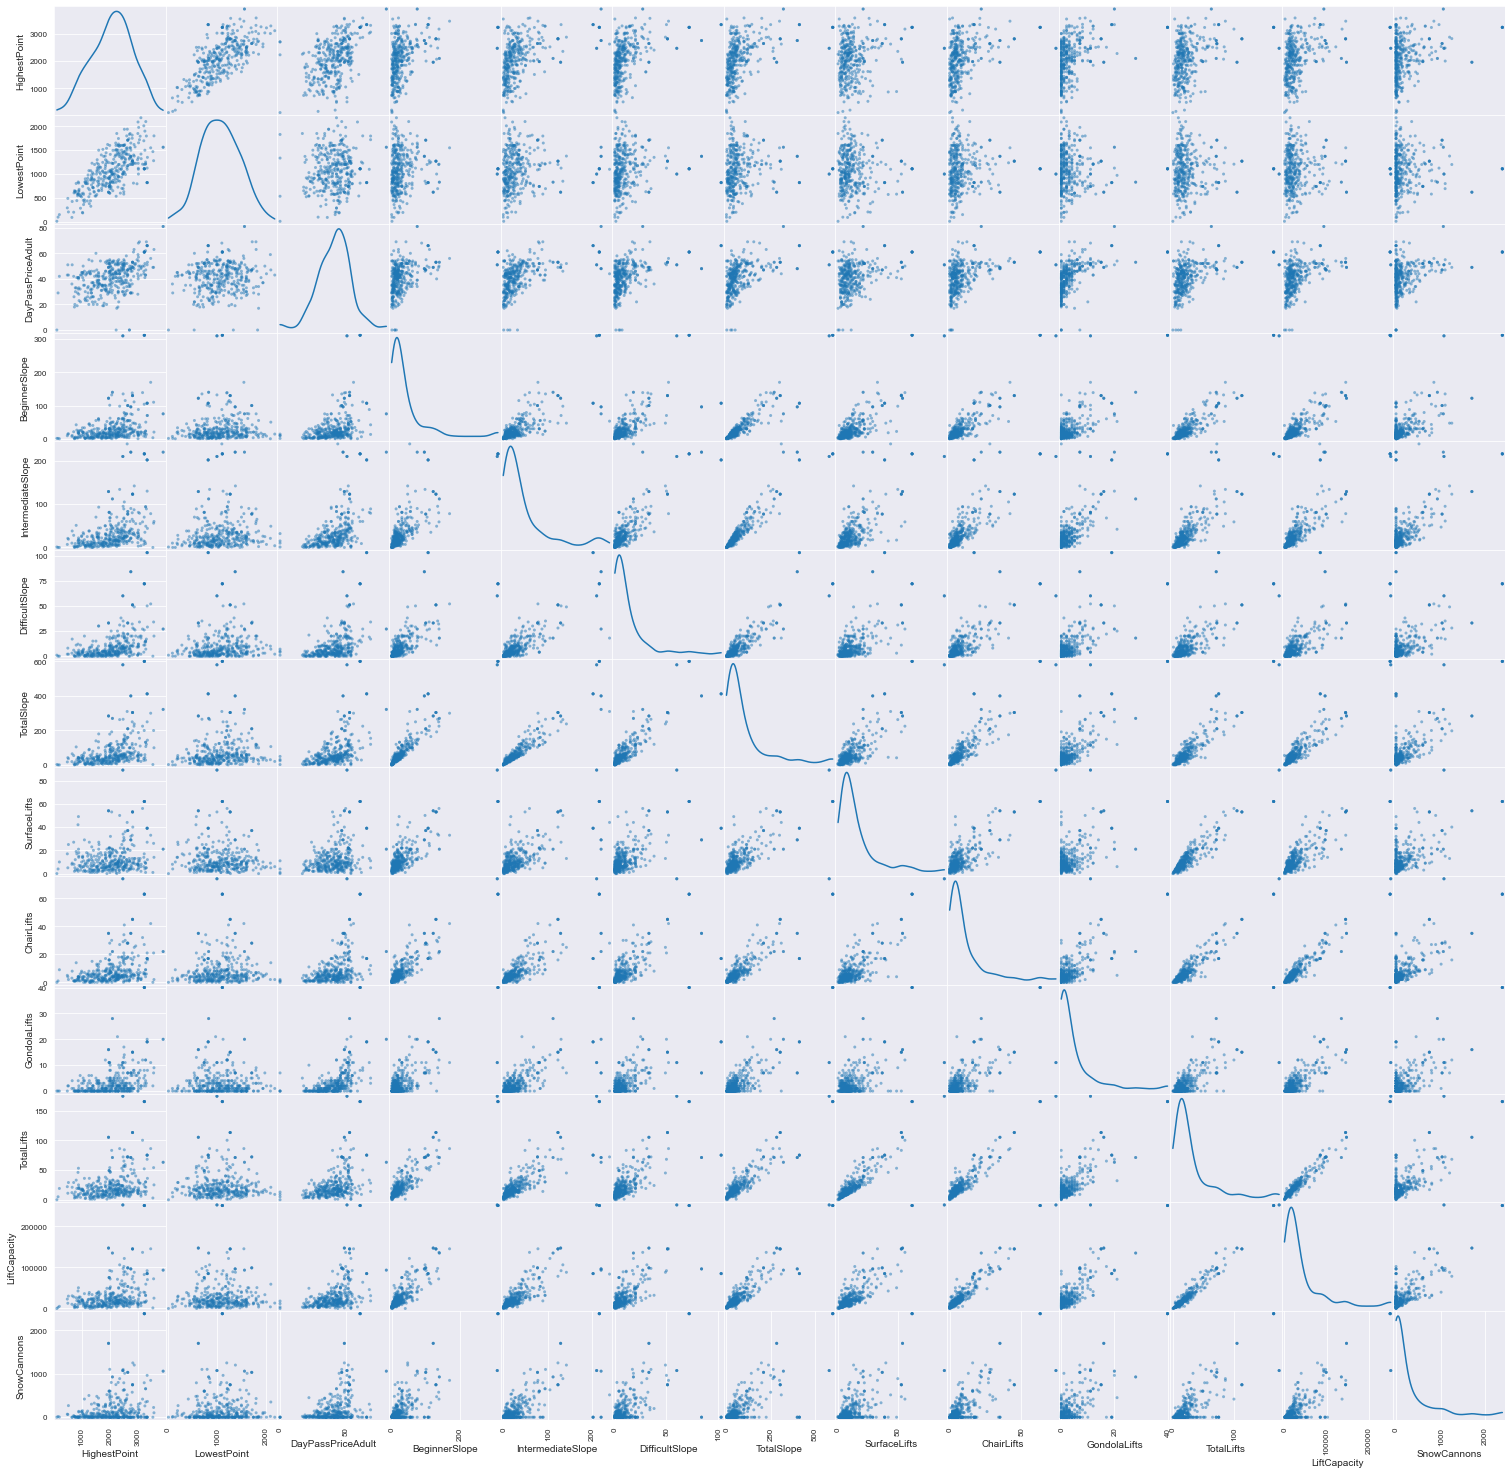

In [94]:
# your code
# Choosing the 'int64' type since it is the only numerical value
df_v_numerical = df_v.select_dtypes('int64')
scatter_matrix(df_v_numerical, alpha=0.5, figsize=(26, 26), diagonal='kde')
plt.show()

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

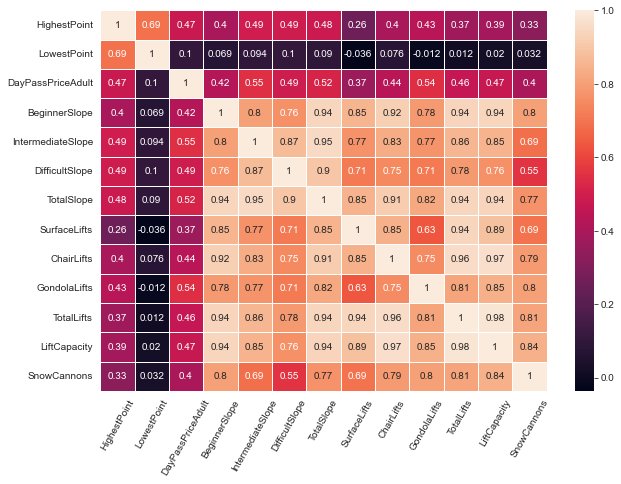

In [24]:
# your code
pearson_correlation_coefficient = df_v_numerical.corr(method='pearson')

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pearson_correlation_coefficient, annot=True, fmt=".2g", linewidths=.5, ax=ax)
# For longer ticks it is sometimes helpful to rotate them
ax.tick_params(axis='x', labelrotation=60)

**Your Answer:**
from the heat map we can see that...

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [25]:
# your code
import warnings
warnings.filterwarnings('ignore')

fig = px.treemap(df_v, path=[px.Constant("Europe"), 'Country', 'Resort'], values='TotalSlope', color= 'TotalSlope',color_continuous_scale='rdbu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:* \
    - France, with a TotalSlopes count of - 12,546.
    - Austria, with a TotalSlopes count of - 7,005.
    - Switzerland, with a TotalSlopes count of - 5,710.
    - Italy, with a TotalSlopes count of - 3,742.
    - Andorra, with a TotalSlopes count of - 723.

*...  2. The max value of TotalSlope of the five countries you identified in 1: 12,546*


### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [26]:
# your code
# In order to use the color legend we need to eliminate the one row that contains 0 in the TotalLifts value, this is due to the fact that it is not possible to draw an area corresponding to 0 volume.

df_v_positive_TotalLifts = df_v[df_v['TotalLifts'] != 0]
fig = px.sunburst(df_v_positive_TotalLifts, path=['Country', 'Snowparks', 'Resort'], values='TotalLifts', color='TotalLifts', color_continuous_scale='brwnyl')
fig.update_layout(margin = dict(t=1, l=0, r=0, b=0))
fig.show()

**Your answer:**
TODO


## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [131]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

import string
import pandas as pd
import ast

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [104]:
# your code
retail_df = pd.read_csv("datasets/retail.csv")
retail_df.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2010 08:26   2.55      178500  United Kingdom  
1  01/12/2010 08:26   3.39      178500  United Kingdom  
2  01/12/2010 08:26   2.75      178500  United Kingdom  
3  01/12/2010 08:26   3.39      178500  United Kingdom  
4  01/12/2010 08:26   3.39      178500  United Kingdom

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [105]:
# your code
print("Number of rows in the dataset = ",retail_df.shape[0])
print("Number of unique customers = ", retail_df['CustomerID'].unique().shape[0])
print("Number of unique product names = ", retail_df['Description'].unique().shape[0])
print("Number of unique invoices = ", retail_df['Invoice'].unique().shape[0])

UniqueCountries = retail_df['Country'].unique()
print("Number of countries where the customers reside = ", UniqueCountries.shape[0])
print("\nList of countries where the customers reside:")
print(*UniqueCountries.tolist(),sep='\n')

Number of rows in the dataset =  406525
Number of unique customers =  4367
Number of unique product names =  3896
Number of unique invoices =  22177
Number of countries where the customers reside =  35

List of countries where the customers reside:
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Austria
Israel
Finland
Greece
Singapore
Lebanon
United Arab Emirates
Saudi Arabia
Czech Republic
Canada
Brazil
USA
Bahrain
Malta
RSA


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [106]:
# your code

# 1. Checking for missing values in the data
print("Number of missing values in the data = ", retail_df.isna().sum().sum())

# 2. Ensuring that the item names are consistent

#Removing trailing spaces
retail_df['Description'] = retail_df['Description'].str.strip()
#Removing all punctuation
retail_df['Description'] = retail_df['Description'].str.translate(str.maketrans('', '', string.punctuation))
#Converting all into  upper case
retail_df['Description'] = retail_df['Description'].str.upper()

uniqueProductNames = retail_df['Description'].unique()
print("Number of unique product names in the cleaned data set = ", uniqueProductNames.shape[0])

# 3. Removing canceled transactions
retail_df = retail_df[retail_df['Invoice'].str.startswith('C')==False]
print("Number of rows in the cleaned data set = ",retail_df.shape[0])

Number of missing values in the data =  0
Number of unique product names in the cleaned data set =  3875
Number of rows in the cleaned data set =  397621


#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [108]:
# your code
print("After applying preprocessing steps, we have : \n\n")
print("Number of rows = ",retail_df.shape[0])
print("Number of unique customers = ", retail_df['CustomerID'].unique().shape[0])
print("Number of unique product names = ", retail_df['Description'].unique().shape[0])
UniqueCountries = retail_df['Country'].unique()
print("Number of countries where the customers reside = ", UniqueCountries.shape[0])
print("\nList of countries where the customers reside:")
print(*UniqueCountries.tolist(),sep='\n')

After applying preprocessing steps, we have : 


Number of rows =  397621
Number of unique customers =  4334
Number of unique product names =  3856
Number of countries where the customers reside =  35

List of countries where the customers reside:
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Finland
Austria
Greece
Singapore
Lebanon
United Arab Emirates
Israel
Saudi Arabia
Czech Republic
Canada
Brazil
USA
Bahrain
Malta
RSA


**Your answer:**
After performing the preprocessing steps, the following values changed -
- **The number of rows** : \
We have eliminated 8904 rows in the preprocessing step
- **The number of unique customers** \
We have eliminated 33 unique customer IDs in the preprocessing step
- **The number of all unique product names** \
We currently have 3856 unique product names, which is 40 less than the original dataset
- **The list of all the countries where the customers reside** \
The list of all countries remain the same

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [110]:
# your code
transaction_df = pd.DataFrame(retail_df.groupby('Invoice')['Description'].apply(lambda s: s.unique()))
print("Number of rows in transaction_df = ", transaction_df.shape[0])
transaction_df.head()

Number of rows in transaction_df =  18524


Description
Invoice                                                   
536365   [WHITE HANGING HEART TLIGHT HOLDER, WHITE META...
536366   [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367   [ASSORTED COLOUR BIRD ORNAMENT, POPPYS PLAYHOU...
536368   [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                          [BATH BUILDING BLOCK WORD]

**Your answer:**
The new dataframe 'transaction_df' has 18524 rows.

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [111]:
# your code

# We first obtain a boolean matrix using TransactionEncoder() on the column of Description (product names)
Description_data = transaction_df['Description'].tolist()
transEnc = TransactionEncoder()
transactions = transEnc.fit(Description_data).transform(Description_data)

# Converting the boolean matrix into a dataframe such that the names of the products appear as column names
transactions = pd.DataFrame(transactions, columns = transEnc.columns_)

# Shape of the matrix
print("The shape of the matrix is = ",transactions.shape)

The shape of the matrix is =  (18524, 3856)


#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [120]:
# your code
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)

In [122]:
# Printing frequent itemsets having at least 3 items
frequent_itemsets['num_items'] = frequent_itemsets['itemsets'].apply(len)
print("All frequent itemsets having at least 3 items : \n")
display(frequent_itemsets[frequent_itemsets['num_items']>2])

All frequent itemsets having at least 3 items : 



support                                           itemsets  num_items
920  0.011607  (ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...          3
921  0.014414  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...          3
922  0.014630  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...          3
923  0.021054  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...          3
924  0.016843  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...          3
925  0.012524  (JUMBO BAG STRAWBERRY, JUMBO BAG PINK POLKADOT...          3
926  0.010149  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...          3
927  0.011876  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU...          3
928  0.010095  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...          3
929  0.010095  (LUNCH BAG PINK POLKADOT, JUMBO BAG RED RETROS...          3
930  0.011013  (LUNCH BAG APPLE DESIGN, LUNCH BAG  BLACK SKUL...          3
931  0.010905  (LUNCH BAG APPLE DESIGN, LUNCH BAG  BLACK SKUL...          3
932  0.014036  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...          3
933  0.014144  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL, ...          3
934  0.012038  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL, ...          3
935  0.012038  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL, ...          3
936  0.010581  (LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE, LUNC...          3
937  0.016627  (LUNCH BAG  BLACK SKULL, LUNCH BAG PINK POLKAD...          3
938  0.012146  (LUNCH BAG  BLACK SKULL, LUNCH BAG PINK POLKAD...          3
939  0.011984  (LUNCH BAG  BLACK SKULL, LUNCH BAG PINK POLKAD...          3
940  0.010689  (LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT, ...          3
941  0.013874  (LUNCH BAG  BLACK SKULL, LUNCH BAG SPACEBOY DE...          3
942  0.013604  (LUNCH BAG  BLACK SKULL, LUNCH BAG SUKI DESIGN...          3
943  0.012416  (LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...          3
944  0.011823  (LUNCH BAG  BLACK SKULL, LUNCH BAG SUKI DESIGN...          3
945  0.011337  (LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...          3
946  0.010041  (LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL, L...          3
947  0.010473  (LUNCH BAG APPLE DESIGN, LUNCH BAG PINK POLKAD...          3
948  0.010581  (LUNCH BAG APPLE DESIGN, LUNCH BAG RED RETROSP...          3
949  0.011769  (LUNCH BAG APPLE DESIGN, LUNCH BAG SUKI DESIGN...          3
950  0.010473  (LUNCH BAG WOODLAND, LUNCH BAG APPLE DESIGN, L...          3
951  0.015062  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...          3
952  0.011984  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...          3
953  0.011121  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...          3
954  0.010581  (LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE, LUNC...          3
955  0.012686  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...          3
956  0.012794  (LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN, L...          3
957  0.012416  (LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE, LUNC...          3
958  0.011013  (LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN, L...          3
959  0.011391  (LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE, LUNC...          3
960  0.011553  (LUNCH BAG DOLLY GIRL DESIGN, LUNCH BAG RED RE...          3
961  0.010095  (LUNCH BAG DOLLY GIRL DESIGN, LUNCH BAG WOODLA...          3
962  0.013550  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...          3
963  0.013604  (LUNCH BAG PINK POLKADOT, LUNCH BAG SUKI DESIG...          3
964  0.012794  (LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT, ...          3
965  0.010797  (LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT, ...          3
966  0.012362  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...          3
967  0.013928  (LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ...          3
968  0.011984  (LUNCH BAG WOODLAND, LUNCH BAG SUKI DESIGN, LU...          3
969  0.014306  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...          3
970  0.010041  (POPPYS PLAYHOUSE BEDROOM, POPPYS PLAYHOUSE LI...          3
971  0.012902  (REGENCY CAKESTAND 3 TIER, PINK REGENCY

In [126]:
# Adding a column for support count for each itemset which have minimum support 0.01
frequent_itemsets['support_count'] = frequent_itemsets['support']*transactions.shape[0]
print("\nThe support counts are indicated as a new column for each itemset satisfying min_support = 0.01 -\n")
print(frequent_itemsets.head())
print("Minimum support count for this specific case (empirically) = ", min(frequent_itemsets['support_count']))
print(f"Minimum support count for this specific case (analytically) = {0.01*transactions.shape[0]}, which in this case actually supports the previous statement")


The support counts are indicated as a new column for each itemset satisfying min_support = 0.01 -

    support                               itemsets  num_items  support_count
0  0.013064               (10 COLOUR SPACEBOY PEN)          1          242.0
1  0.010041      (12 MESSAGE CARDS WITH ENVELOPES)          1          186.0
2  0.014900        (12 PENCIL SMALL TUBE WOODLAND)          1          276.0
3  0.016573  (12 PENCILS SMALL TUBE RED RETROSPOT)          1          307.0
4  0.015709          (12 PENCILS SMALL TUBE SKULL)          1          291.0
Minimum support count for this specific case (empirically) =  186.0
Minimum support count for this specific case (analytically) = 185.24, which in this case actually supports the previous statement


**Your answer:**
TODO

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [127]:
# your code

# Minimum Confidence = 0.6
associationRules_06Conf = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
associationRules_06Conf

antecedents  \
0                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
1                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
2                        (ALARM CLOCK BAKELIKE ORANGE)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
4                           (ALARM CLOCK BAKELIKE RED)   
..                                                 ...   
137  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
138  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...   
139  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...   
140  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL, ...   
141  (LUNCH BAG  BLACK SKULL, LUNCH BAG PINK POLKAD...   

                                           consequents  antecedent support  \
0                         (ALARM CLOCK BAKELIKE GREEN)            0.017383   
1                           (ALARM CLOCK BAKELIKE RED)            0.017383   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.019380   
3                           (ALARM CLOCK BAKELIKE RED)            0.042593   
4                         (ALARM CLOCK BAKELIKE GREEN)            0.047290   
..                                                 ...                 ...   
137  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...            0.020190   
138                          (LUNCH BAG RED RETROSPOT)            0.014036   
139                           (LUNCH BAG  BLACK SKULL)            0.015062   
140                          (LUNCH BAG PINK POLKADOT)            0.014144   
141                              (LUNCH BAG CARS BLUE)            0.016627   

     consequent support   support  confidence       lift  leverage  conviction  
0              0.042593  0.011337    0.652174  15.311622  0.010596    2.752544  
1              0.047290  0.012200    0.701863  14.841686  0.011378    3.195548  
2              0.042593  0.011876    0.612813  14.387522  0.011051    2.472726  
3              0.047290  0.028612    0.671736  14.204617  0.026597    2.902271  
4              0.042593  0.028612    0.605023  14.204617  0.026597    2.423954  
..                  ...       ...         ...        ...       ...         ...  
137            0.023537  0.012902    0.639037  27.150297  0.012427    2.705164  
138            0.069531  0.010419    0.742308  10.675860  0.009443    3.610774  
139            0.056791  0.010419    0.691756  12.180697  0.009564    3.059945  
140            0.050259  0.010419    0.736641  14.656866  0.009708    3.606262  
141            0.052149  0.010419    0.626623  12.016119  0.009552    2.538593  

[142 rows x 9 columns]

In [128]:
# Minimum Confidence = 0.9
associationRules_09Conf = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.9)
associationRules_09Conf

antecedents  \
0                           (REGENCY TEA PLATE PINK)   
1  (POPPYS PLAYHOUSE BEDROOM, POPPYS PLAYHOUSE LI...   
2  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   

                         consequents  antecedent support  consequent support  \
0          (REGENCY TEA PLATE GREEN)            0.012092            0.014576   
1         (POPPYS PLAYHOUSE KITCHEN)            0.011067            0.018678   
2  (GREEN REGENCY TEACUP AND SAUCER)            0.014306            0.037303   

    support  confidence       lift  leverage  conviction  
0  0.010905    0.901786  61.869180  0.010729   10.033411  
1  0.010041    0.907317  48.575553  0.009834   10.587943  
2  0.012902    0.901887  24.177353  0.012369    9.812104

**Your answer:**
For minimum confidence 0.6, we get 142 association rules, whereas for minimum confidence 0.9, we get 3 association rules.

This shows that, as we increase the value of minimum confidence, we get fewer number of association rules. That is, as we move the confidence threshold up, we get lesser number of association rules that might be considered strong.

This does hold merit since as we increase our desired confidence, so does the "evidence" count needs to increase, which is ofcourse limited.

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [129]:
# your code
associationRules_06Conf = associationRules_06Conf.sort_values('lift',ascending=False)
associationRules_06Conf.head(2)

antecedents                consequents  antecedent support  \
54   (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE GREEN)            0.012092   
53  (REGENCY TEA PLATE GREEN)   (REGENCY TEA PLATE PINK)            0.014576   

    consequent support   support  confidence      lift  leverage  conviction  
54            0.014576  0.010905    0.901786  61.86918  0.010729   10.033411  
53            0.012092  0.010905    0.748148  61.86918  0.010729    3.922574

*Your answer:*
We notice that the two rules with the highest lift have the same antecedents and precedents, only reversed. This shows strong association rule between items 'REGENCY TEA PLATE PINK' and 'REGENCY TEA PLATE GREEN'. One purchase strongly implies the other, in both directions. \
Further, both the rules have same support, lift and leverage.

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:** \
In this new scenario, if an itemset is frequent, then it would mean that this specific itemset is frequently purchased by different customers (irrelevant of the transactions themselves).

An association rule $A \Rightarrow B$ meant that, if items in $A$ are purchased, by a specific customer then that customer would be likely to purchase the items in $B$ from the store as well.

In a way, this variation would give us more insight into customer's purchasing preferences in general (over time) and not per transaction.



### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [133]:
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})
retail_sequences.head()

Customer                                           Sequence
0    178500  [[white hanging heart t-light holder, white me...
1    130470  [[assorted colour bird ornament, poppy's playh...
2    125830  [[alarm clock bakelike pink, alarm clock bakel...
3    137480  [[paper chain kit 50's christmas], [biscuit ti...
4    151000  [[victorian sewing box large], [victorian sewi...

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [161]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [162]:
def contained(is_seq2):
    is_seq1 = s
    size1 = len(is_seq1)
    size2 = len(is_seq2)

    if size1 > size2:
        return False

    last_1 = 0
    last_2 = 0

    while last_1 < size1 and last_2 < size2:
        item1 = is_seq1[last_1]
        item2 = is_seq2[last_2]
        if set(item1) <= set(item2):
            last_1 += 1
        last_2 += 1

    if last_1 == size1:
        return True
    else:
        return False

retail_sequences['isContained'] = retail_sequences['Sequence'].apply(contained)

In [163]:
print("The support count of the given sequence 's' is = ",retail_sequences['isContained'].sum())
print("The CustomerID's whose corresponding itemset sequence contains sequence 's' are - \n")
retail_sequences['Customer'][retail_sequences['isContained']==1]

The support count of the given sequence 's' is =  5
The CustomerID's whose corresponding itemset sequence contains sequence 's' are - 



46      127480
65      149110
69      178410
428     130500
1111    132630
Name: Customer, dtype: int64

## Question 4: Text Mining (12 pts)

In [215]:
import nltk
import multiprocessing
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from nltk.lm import MLE

#to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

#for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

#for tokenization and punctuation removal
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ilyafradlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ilyafradlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ilyafradlin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ilyafradlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [170]:
# your code
friends_df = pd.read_csv('datasets/FRIENDS.csv')
friends_df.head()

character                                               line
0    Monica   There's nothing to tell! He's just some guy I...
1      Joey   C'mon  you're going out with the guy! There's...
2  Chandler   All right Joey  be nice.  So does he have a h...
3    Phoebe                           Wait  does he eat chalk?
4    Phoebe   Just  'cause  I don't want her to go through ...

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

  Character_Names  Line_Counts
0          Rachel         8506
1            Ross         8264
2        Chandler         7687
3          Monica         7651
4            Joey         7573
5          Phoebe         6833


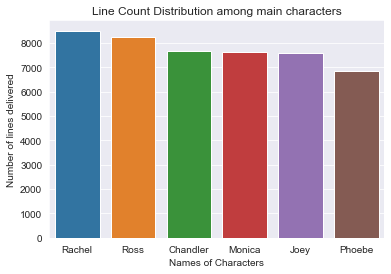

In [171]:
# your code
import matplotlib.pyplot as plt

# Counting frequency of appearance of each unique main character in FRIENDS
CharacterLines = pd.DataFrame(friends_df['character'].value_counts())

# Resetting index in our dataframe and renaming the columns
CharacterLines = CharacterLines.reset_index()
CharacterLines.columns = ['Character_Names', 'Line_Counts']
print(CharacterLines)

# Plotting the line count distribution
sns.barplot(data=CharacterLines, x="Character_Names", y="Line_Counts")
plt.xlabel("Names of Characters")
plt.ylabel("Number of lines delivered")
plt.title("Line Count Distribution among main characters")
plt.show()

**Your answer:** \
From the plot above, we see that the line count distribution decreases as we move from Rachel towards Phoebe. In other words, Rachel has the maximum number of lines in the script, followed by Ross, Chandler, Monica, Joey and Phoebe (in that order). Hence, Phoebe has the least number of lines in the script.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [172]:
# your code
corpus = friends_df['line'].tolist()
print(f"The corpus has {len(corpus)} documents")
print(f"The original dataset FRIENDS.csv has {friends_df.shape[0]} rows")

The corpus has 46514 documents
The original dataset FRIENDS.csv has 46514 rows


#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [180]:
# your code
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def my_preprocessor(text):

    tokenized = tokenizer.tokenize(text)
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [181]:
# your code
corpus_p =  list(map(my_preprocessor, corpus))

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [182]:
# your code
from sklearn.model_selection import train_test_split
friends_train, friends_test = train_test_split(friends_df, test_size=0.20, stratify = friends_df['character'],random_state=42)

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [183]:
# your code
corpus_train = friends_train['line'].tolist()
corpus_test = friends_test['line'].tolist()

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [184]:
# your code
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors = sow.fit(corpus)

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [185]:
# your code

# We pick line number 101

s = corpus[101]
print('Line in its original form : ',s)
print('Line in its preprocessed version : ',corpus_p[101])
print('SoW Encoding :\n',sow.transform([s]))

Line in its original form :   Oh  I wish I could  but I don't want to.
Line in its preprocessed version :  oh wish could want
SoW Encoding :
   (0, 2320)	1
  (0, 6926)	1
  (0, 10912)	1
  (0, 11162)	1


In [187]:
# We check the words in our SoW vocabulary
d = sow.vocabulary_
print("Value of 'oh' in the SoW dictionary = ",d.get('oh'))
print("Value of 'wish' in the SoW dictionary = ",d.get('wish'))
print("Value of 'could' in the SoW dictionary = ",d.get('could'))
print("Value of 'want' in the SoW dictionary = ",d.get('want'))

# Checking for words that could be uncounted because of the sentence being in its original form
print("Value of 'don't' in the SoW dictionary = ",d.get("don't"))
print("Value of 'do' in the SoW dictionary = ",d.get('do'))
print("Value of 'not' in the SoW dictionary = ",d.get('not'))

Value of 'oh' in the SoW dictionary =  6926
Value of 'wish' in the SoW dictionary =  11162
Value of 'could' in the SoW dictionary =  2320
Value of 'want' in the SoW dictionary =  10912
Value of 'don't' in the SoW dictionary =  None
Value of 'do' in the SoW dictionary =  None
Value of 'not' in the SoW dictionary =  None


**Your answer:**
Looking at the set of words encoding, we see that -
1. We get an array of 0's and 1's, where a 0 indicates that the corresponding word is not present in our selected sentence, and 1 indicates that the corresponding word is present in our sentence. We get 1 for the words ${oh, wish, could, want}$ and 0 for every other word in the SoW dictionary.
2. Moreover, even though our sentence contains 8 distinct words ${oh, I, wish, could, but, don't, want, to}$, we get only 4 'true' values in the encoding. This can be justified by the fact that we used our preprocessor `my_preprocessor`which performs stopword removal and lemmatization. Hence, the vocabulary is shortened already.
3. We also checked if $don't$ was not counted because it might have been tokenized in the dictionary, but we see that it does not exist in the dictionary as $do$ $not$ either.

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [188]:
# your code
sow_train = CountVectorizer(binary=True, preprocessor=my_preprocessor)
sow_train.fit(corpus_train)
X_train = sow_train.transform(corpus_train)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [190]:
# your code

X_test = sow_train.transform(corpus_test)
y_test = friends_test['character'].tolist()
y_train = friends_train['character'].tolist()

SGD = SGDClassifier(loss='log_loss')
SGD.fit(X_train,y_train)

predicted_train = SGD.predict(X_train)
predicted_test = SGD.predict(X_test)

accuracy_train = accuracy_score(y_train, predicted_train, normalize=True)
print('Classifier accuracy on training set:', accuracy_train)

accuracy_test = accuracy_score(y_test, predicted_test, normalize=True)
print('Classifier accuracy on test set:', accuracy_test)

Classifier accuracy on training set: 0.42111203676332265
Classifier accuracy on test set: 0.29162635708911105


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:**
TODO

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [197]:
# your code
Line1_original = corpus[100]
Line2_original = corpus[200]
Line1_original_character = friends_df['character'][100]
Line2_original_character = friends_df['character'][200]

Line1_train = sow_train.transform([Line1_original])
Line2_train = sow_train.transform([Line2_original])
Line1_predicted_character = SGD.predict(Line1_train)
Line2_predicted_character = SGD.predict(Line2_train)

print("First Line = ",Line1_original)
print("Original Character = ", Line1_original_character)
print("Predicted Character = ",Line1_predicted_character[0])

print("\nSecond Line = ",Line2_original)
print("Original Character = ", Line2_original_character)
print("Predicted Character = ",Line2_predicted_character[0])

  (0, 4234)	1
  (0, 4255)	1
  (0, 6764)	1
  (0, 9939)	1
First Line =   Hey Pheebs  you wanna help?
Original Character =  Joey
Predicted Character =  Joey

Second Line =   You got a job?
Original Character =  Ross
Predicted Character =  Rachel


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [198]:
# your code
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]

cores = multiprocessing.cpu_count()

# determining parameters of the model
doc2vec = Doc2Vec(vector_size=10, min_count=3, workers=cores)
# building the vocabulary
doc2vec.build_vocab(docs)

# document embedding, create the embedding based on all documents in the corpus
doc2vec.train(corpus_iterable=docs, total_examples=doc2vec.corpus_count, epochs=100)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [209]:
# your code
line_number = 1000
d1= corpus_p[line_number]

# infer_vector requires the sentence (=document) to be passed as a list of tokens
d1_tokens = tokenizer.tokenize(d1)
d1_embedding = doc2vec.infer_vector(d1_tokens)
most_similar_docs = doc2vec.dv.most_similar(d1_embedding) #gives you top 10 document tags and their cosine similarity
tag = most_similar_docs[0][0] #obtain the tag of the first document

d1_original = friends_df.iloc[line_number]['line']
d_similar_original = friends_df.iloc[tag]['line']

print('Originally selected line : ', d1_original)
print('Character saying the above line : ',friends_df['character'][line_number])
print('\nMost similar line w.r.t. the Doc2Vec encoding : ',d_similar_original)
print('Character saying the above most similar line : ',friends_df['character'][tag])

Originally selected line :   Nothing  nothing. Lee-lo  the laundry's done.
Character saying the above line :  Ross

Most similar line w.r.t. the Doc2Vec encoding :   no they don't
Character saying the above most similar line :  Chandler


**Your answer:**
TODO

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [218]:
# your code
#Extracting lines of each character
CharacterNames = list(friends_df['character'].unique())
corpus_characters = [friends_df[friends_df['character']==i]['line'] for i in CharacterNames]

# Preprocessing the corpus of each character according to given instructions
corpus_characters_preprocessed = []
for character_corpus in corpus_characters:
    corp_temp = []
    for line in character_corpus:
        tokenized = tokenizer.tokenize(line)
        filtered = [word.lower() for word in tokenized]
        corp_temp.append(filtered)
    corpus_characters_preprocessed.append(corp_temp)

print("\nCorpus of Chandler :\n",corpus_characters_preprocessed[2])


Corpus of Chandler :
 [['all', 'right', 'joey', 'be', 'nice', 'so', 'does', 'he', 'have', 'a', 'hump', 'a', 'hump', 'and', 'a', 'hairpiece'], ['sounds', 'like', 'a', 'date', 'to', 'me'], ['alright', 'so', 'i', 'm', 'back', 'in', 'high', 'school', 'i', 'm', 'standing', 'in', 'the', 'middle', 'of', 'the', 'cafeteria', 'and', 'i', 'realize', 'i', 'am', 'totally', 'naked'], ['then', 'i', 'look', 'down', 'and', 'i', 'realize', 'there', 's', 'a', 'phone', 'there'], ['that', 's', 'right'], ['all', 'of', 'a', 'sudden', 'the', 'phone', 'starts', 'to', 'ring', 'now', 'i', 'don', 't', 'know', 'what', 'to', 'do', 'everybody', 'starts', 'looking', 'at', 'me'], ['finally', 'i', 'figure', 'i', 'd', 'better', 'answer', 'it', 'and', 'it', 'turns', 'out', 'it', 's', 'my', 'mother', 'which', 'is', 'very', 'very', 'weird', 'because', 'she', 'never', 'calls', 'me'], ['cookie'], ['sometimes', 'i', 'wish', 'i', 'was', 'a', 'lesbian', 'did', 'i', 'say', 'that', 'out', 'loud'], ['and', 'i', 'just', 'want', 'a

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [219]:
# your code

#Building the trigram model for each character separately
lm_trigram = []

# the padded_everygram_pipeline goes through the corpus, applies left and right padding to the sentences (adding <s> and </s>)
# and obtains the tuples of a given order together with the vocabulary

for i in range(len(CharacterNames)):
    padded_tuples, vocab = padded_everygram_pipeline(3, corpus_characters_preprocessed[i])
    lm_trigram.append(MLE(3))
    lm_trigram[i].fit(padded_tuples, vocab)

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [221]:
# your code

for i in range(len(CharacterNames)):
  print(CharacterNames[i])
  print(lm_trigram[i].generate(10))

Monica
['</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Joey
['</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Chandler
['have', 'to', 'help', 'out', 'with', 'the', 'fricken', 'right', '</s>', '</s>']
Phoebe
['i', 've', 'had', 'a', 'serious', 'relationship', 'and', 'you', 'can', 'give']
Ross
['like', 'to', 'make', 'jokes', 'now', '</s>', '</s>', '</s>', '</s>', '</s>']
Rachel
['year', 'so', 'i', 'll', 'talk', 'to', 'you', 'for', 'taking', 'care']


## Question 5: Process Mining (22pts)

In [1]:
import pandas as pd
import pm4py

In [2]:
from pm4py.statistics.traces.generic.log import case_statistics

In [3]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [4]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [5]:
# your code
dataframe = pd.read_csv('datasets/reimburse.csv', sep=',')
dataframe = pm4py.format_dataframe(dataframe, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
dataframe = dataframe.sort_values(by=['Timestamp'])
event_log = pm4py.convert_to_event_log(dataframe)
dataframe = dataframe.reset_index(drop = True)
dataframe.head(20)

Timestamp  CaseId              Activity  ModelTime  \
0  2020-06-01 06:00:00+00:00       0                Online          0   
1  2020-06-01 06:16:43+00:00       1                Online       1003   
2  2020-06-01 08:21:49+00:00       2                   App       8509   
3  2020-06-01 09:19:59+00:00       0          Register Low      11999   
4  2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411   
5  2020-06-01 09:28:00+00:00       1         Register High      12480   
6  2020-06-01 09:34:59+00:00       1  Ask if Reimbursement      12899   
7  2020-06-01 10:26:05+00:00       3                   App      15965   
8  2020-06-01 10:42:07+00:00       2          Register Low      16927   
9  2020-06-01 10:47:03+00:00       2          Assess Fraud      17223   
10 2020-06-01 10:49:00+00:00       2  Ask if Reimbursement      17340   
11 2020-06-01 10:51:46+00:00       2           Close Fraud      17506   
12 2020-06-01 11:05:47+00:00       4                Online      18347   
13 2020-06-01 12:45:50+00:00       3          Register Low      24350   
14 2020-06-01 12:52:56+00:00       3  Ask if Reimbursement      24776   
15 2020-06-01 13:25:57+00:00       4          Register Low      26757   
16 2020-06-01 13:29:48+00:00       5                Online      26988   
17 2020-06-01 13:32:53+00:00       4  Ask if Reimbursement      27173   
18 2020-06-01 14:22:44+00:00       6                   App      30164   
19 2020-06-01 15:09:11+00:00       7                   App      32951   

   Resource Brand case:concept:name          concept:name  \
0       111  PEAR                 0                Online   
1       111    CP                 1                Online   
2       111    CP                 2                   App   
3         1  PEAR                 0          Register Low   
4         1  PEAR                 0  Ask if Reimbursement   
5         2    CP                 1         Register High   
6         2    CP                 1  Ask if Reimbursement   
7       111  PEAR                 3                   App   
8         1    CP                 2          Register Low   
9        20    CP                 2          Assess Fraud   
10        1    CP                 2  Ask if Reimbursement   
11       20    CP                 2           Close Fraud   
12      111  PEAR                 4                Online   
13        1  PEAR                 3          Register Low   
14        2  PEAR                 3  Ask if Reimbursement   
15        1  PEAR                 4          Register Low   
16      111  PEAR                 5                Online   
17        1  PEAR                 4  Ask if Reimbursement   
18      111    CP                 6                   App   
19      111  PEAR                 7                   App   

              time:timestamp  @@index  
0  2020-06-01 06:00:00+00:00        0  
1  2020-06-01 06:16:43+00:00        4  
2  2020-06-01 08:21:49+00:00     5346  
3  2020-06-01 09:19:59+00:00        1  
4  2020-06-01 09:26:51+00:00        2  
5  2020-06-01 09:28:00+00:00        5  
6  2020-06-01 09:34:59+00:00        6  
7  2020-06-01 10:26:05+00:00    10653  
8  2020-06-01 10:42:07+00:00     5347  
9  2020-06-01 10:47:03+00:00     5348  
10 2020-06-01 10:49:00+00:00     5349  
11 2020-06-01 10:51:46+00:00     5350  
12 2020-06-01 11:05:47+00:00    15956  
13 2020-06-01 12:45:50+00:00    10654  
14 2020-06-01 12:52:56+00:00    10655  
15 2020-06-01 13:25:57+00:00    15957  
16 2020-06-01 13:29:48+00:00    21299  
17 2020-06-01 13:32:53+00:00    15958  
18 2020-06-01 14:22:44+00:00    26647  
19 2020-06-01 15:09:11+00:00    32001

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [6]:
# your code
num_events = len(dataframe)
num_cases = len(dataframe.CaseId.unique())
early_tmstmp = dataframe.Timestamp[0]
late_tmstmp = dataframe['Timestamp'].iloc[-1]

print(f'Number of events: {num_events}')
print(f'Number of cases: {num_cases}')
print(f'Earliest Timestamp: {early_tmstmp}')
print(f'Latest Timestamp: {late_tmstmp}')
variants = pm4py.get_variants_as_tuples(event_log)
print(f'Number of trace variants: {len(variants.keys())}')
# print(dataframe.Timestamp[0])
# print(dataframe.Timestamp[1])

Number of events: 47830
Number of cases: 10000
Earliest Timestamp: 2020-06-01 06:00:00+00:00
Latest Timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [7]:
# your code
def difference_calculator(df_i, i):
    time_difference = df_i.Timestamp[i+1]-df_i.Timestamp[i]
    return time_difference.total_seconds()

num_sim_events = 0
last_index_of_similarity = 0
one_resource_sim = False

for e in range(dataframe.shape[0]-1):
    if difference_calculator(dataframe, e) < 0.1:
        if last_index_of_similarity == e + 1:
            num_sim_events += 1

        else:
            num_sim_events += 2

        last_index_of_similarity = e
print('number of almost simultaneous events = ', num_sim_events)

dataframe = dataframe.sort_values(by=['Resource', 'Timestamp'])
dataframe = dataframe.reset_index(drop = True)
for e in range(dataframe.shape[0]-1):
    if dataframe.Resource[e+1] == dataframe.Resource[e]:
        if difference_calculator(dataframe, e) < 0.1:
            one_resource_sim = True
            break
print('The answer is = ', one_resource_sim)


dataframe = dataframe.sort_values(by=['CaseId', 'Timestamp'])
dataframe = dataframe.reset_index(drop = True)
# display(dataframe.head(40))
num_sim_activity = 0
last_case_sametime = -1
for e in range(dataframe.shape[0]-1):
    if dataframe.CaseId[e+1] == dataframe.CaseId[e]:
        if difference_calculator(dataframe, e) < 0.1:
            if last_case_sametime != dataframe.CaseId[e]:           #Current case compared with the last case where two activities occurred at the same time
                num_sim_activity += 1
                last_case_sametime = dataframe.CaseId[e]
print("Number of cases where two activities happen at almost the same time = ", num_sim_activity)

number of almost simultaneous events =  1376
The answer is =  False
Number of cases where two activities happen at almost the same time =  21


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

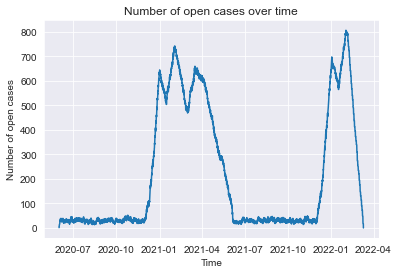

In [8]:
dataframe = dataframe.sort_values(by=['Timestamp'])
dataframe = dataframe.reset_index(drop = True)
num_active_cases = []
log_start = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
open_cases_list = set()
for i in range(dataframe.shape[0]):
    if dataframe.Activity[i] == "Online" or dataframe.Activity[i] == "App":
        open_cases_list.add(dataframe.CaseId[i])
    if dataframe.Activity[i] == "Pay" or dataframe.Activity[i] == "Send Repaired" or dataframe.Activity[i] == "Send New" or dataframe.Activity[i] == "Fill Fraud Report":
        open_cases_list.discard(dataframe.CaseId[i])
    num_active_cases.append(len(open_cases_list))
plt.plot(dataframe.Timestamp, num_active_cases)
plt.ylabel('Number of open cases')
plt.xlabel('Time')
plt.title("Number of open cases over time")
plt.show()

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

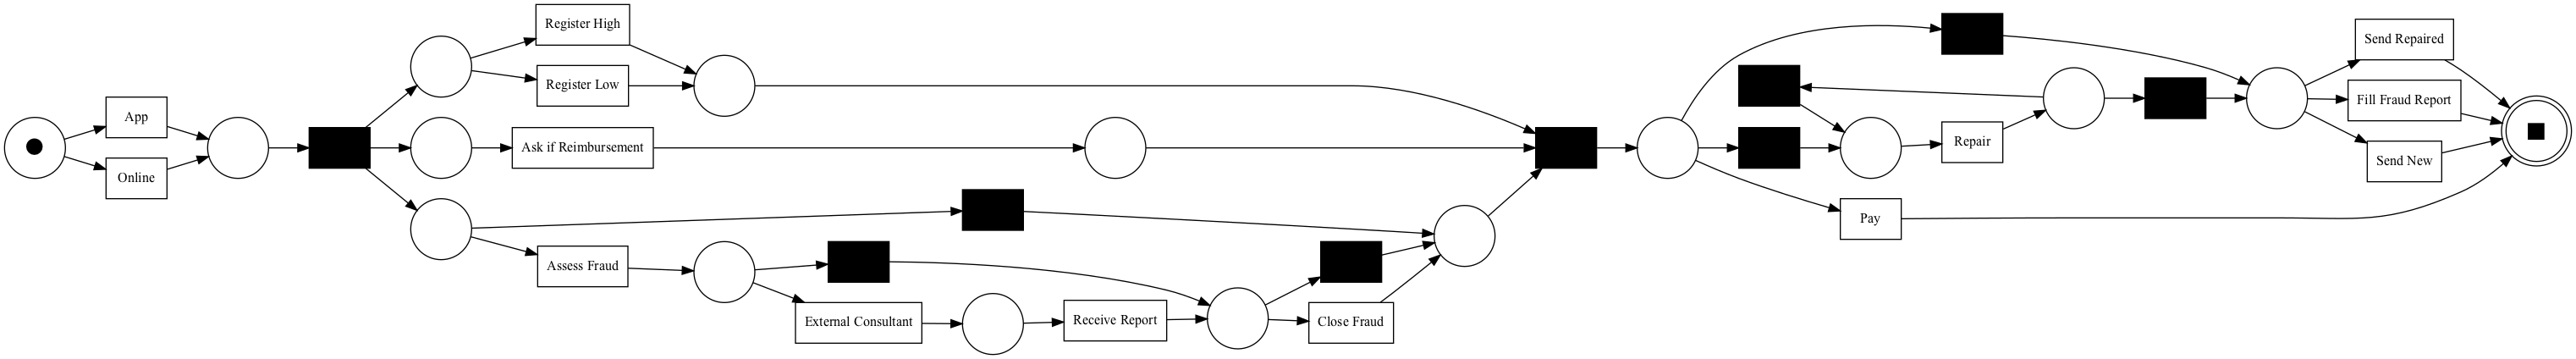

In [9]:
# your code
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm, format='png')

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [10]:
# 1
fitness_replay = pm4py.fitness_token_based_replay(event_log, net, im, fm)
print("Fitness is ", fitness_replay['average_trace_fitness'])

# 2
# token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(event_log, net, im, fm)
# missing_tokens = 0
# consumed_tokens = 0
# remaining_tokens = 0
# produced_tokens = 0
# for l in token_replay_result:
#     produced_tokens += l['produced_tokens']
#     remaining_tokens += l['remaining_tokens']
#     consumed_tokens += l['consumed_tokens']
#     missing_tokens += l['missing_tokens']
# fitness = 0.5 * (1 - missing_tokens/ consumed_tokens) + 0.5 * (1 - remaining_tokens/ produced_tokens)
# print("Fitness is ", fitness)

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Fitness is  1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [14]:
# your code
log_low = pm4py.filter_event_attribute_values(event_log, "concept:name", ["Register Low"], level = "case",retain= True)

print('Number of traces = ',len(log_low))

Number of traces =  7021


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

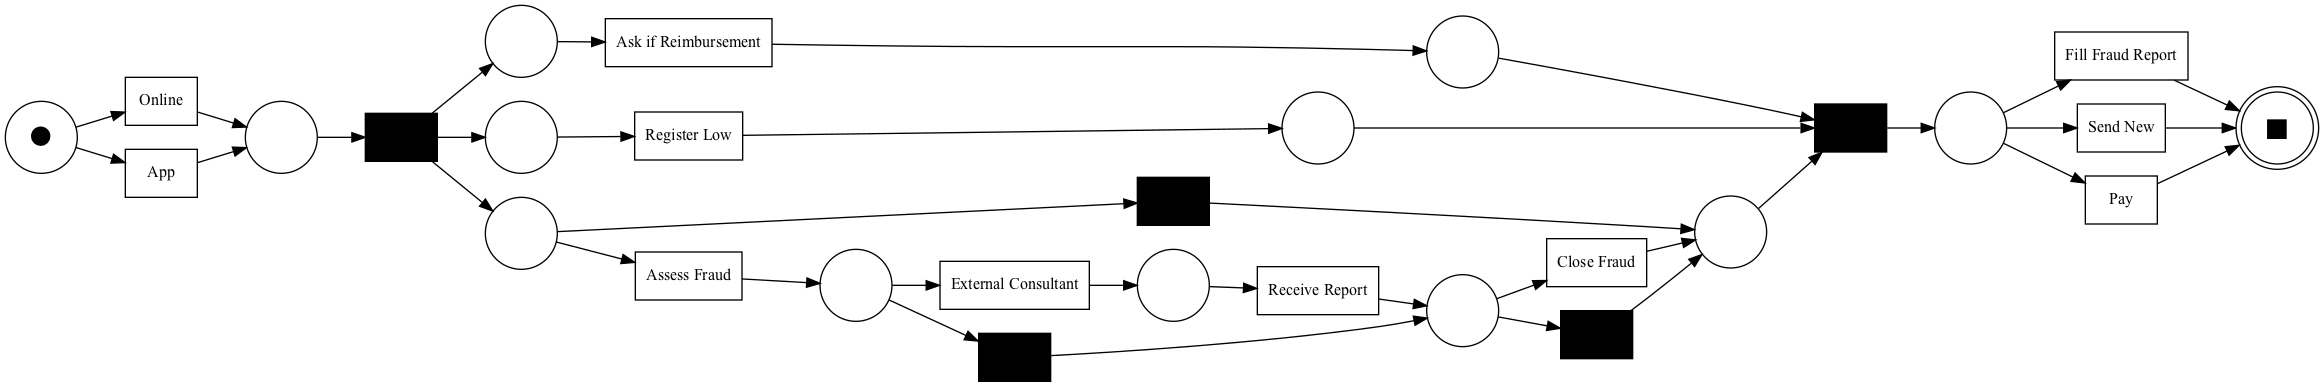

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

Fitness is  1.0


In [15]:
# your code
net_low, im_low, fm_low = pm4py.discover_petri_net_inductive(log_low)
pm4py.view_petri_net(net_low, im_low, fm_low, format='png')

fitness_replay_low = pm4py.fitness_token_based_replay(log_low, net_low, im_low, fm_low)
print("Fitness is ", fitness_replay_low['average_trace_fitness'])

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

# TODO

**Your answer**: *(Relate your observations to precision here.)*

# TODO

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



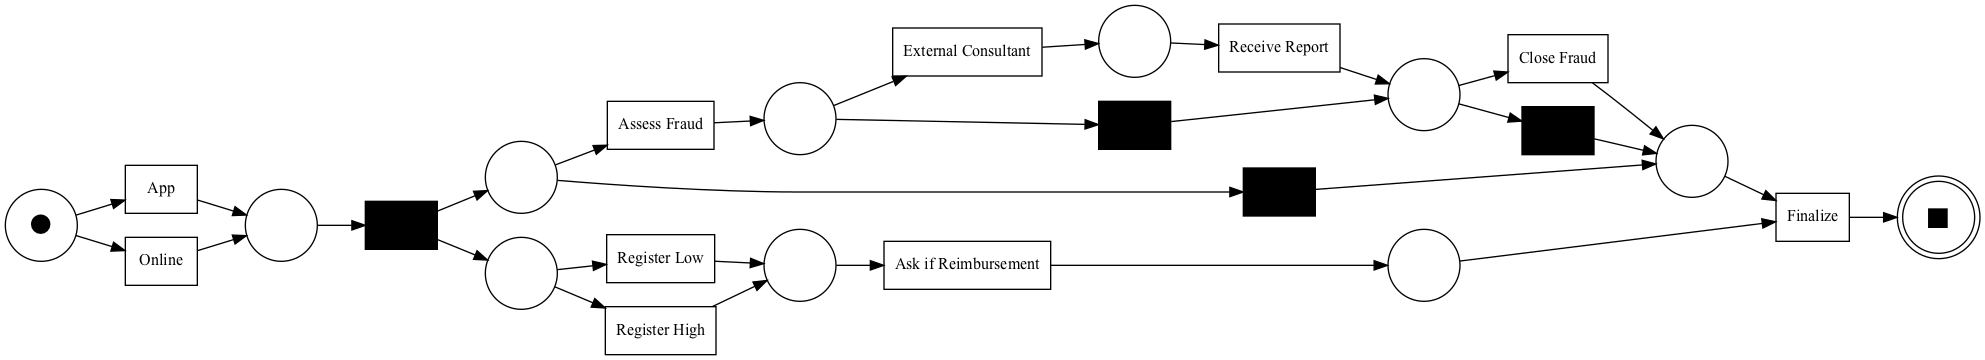

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

{'perc_fit_traces': 91.01, 'average_trace_fitness': 0.9892081818181783, 'log_fitness': 0.9892890758104679, 'percentage_of_fitting_traces': 91.01}


In [16]:
# your code
# Import
net_dejure, im_dejure, fm_dejure = pm4py.read_pnml('datasets/pn_conf.apnml')
pm4py.view_petri_net(net_dejure, im_dejure, fm_dejure)
log_xes = pm4py.read_xes('datasets/log_conf.xes')
# Fitness
fitness_log_xes = pm4py.fitness_token_based_replay(log_xes, net_dejure, im_dejure, fm_dejure)
print(fitness_log_xes)

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [17]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_xes, net_dejure, im_dejure, fm_dejure, parameters={"enable_pltr_fitness": True, "disable_variants": True})
print(place_fitness.keys())

replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

dict_keys([n1, n3, n4, n6, n9, n5, n2, n7, n8, n10, n11])


In [18]:
# from tabulate import tabulate
Keys = []
m = []
r = []
c = []
p = []
for k, v in place_fitness.items():
    # print(str(k), v['m'], v['r'], v['c'], v['p'])
    Keys.append(str(k))
    m.append(v['m'])
    r.append(v['r'])
    c.append(v['c'])
    p.append(v['p'])
tbl_df = pd.DataFrame({'Place':Keys, 'Missing Tokens': m,
     'Remaining Token': r,
     'Consumed Tokens': c,
          'Produced Tokens':p
    })
import re
for i in range(len(Keys)):
    Keys[i] = int((re.split('(\d+)',Keys[i])[1]))
tbl_df['Place'] = Keys
tbl_df = tbl_df.sort_values(by= ["Place"])
tbl_df = tbl_df.reset_index(drop= True)
display(tbl_df)

Place  Missing Tokens  Remaining Token  Consumed Tokens  Produced Tokens
0       1             899              899            10000            10000
1       2               0                0            10000            10000
2       3               0                0               99               99
3       4               0                0             1917             1917
4       5               0                0            10000            10000
5       6               0                0            10000            10000
6       7               0                0            10000            10000
7       8               0                0            10000            10000
8       9               0                0             1917             1917
9      10               0                0            10000            10000
10     11               0                0            10000            10000

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [19]:
# your code
## TODO
log_xes[1]

{'attributes': {'concept:name': '1'}, 'events': [{'Timestamp': datetime.datetime(2020, 6, 1, 6, 16, 43, tzinfo=datetime.timezone.utc), 'CaseId': 1, 'Activity': 'Online', 'ModelTime': 1003, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2020, 6, 1, 6, 16, 43, tzinfo=datetime.timezone.utc), '@@index': 4}, '..', {'Timestamp': datetime.datetime(2020, 6, 3, 11, 36, 57, tzinfo=datetime.timezone.utc), 'CaseId': 1, 'Activity': 'Send Repaired', 'ModelTime': 193017, 'Resource': '1', 'Brand': 'CP', 'concept:name': 'Finalize', 'time:timestamp': datetime.datetime(2020, 6, 3, 11, 36, 57, tzinfo=datetime.timezone.utc), '@@index': 8}]}

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


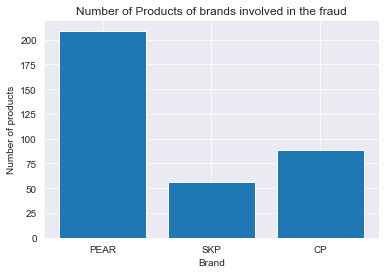

In [20]:
# your code
from collections import Counter

Fraud_Brands = []
filtered_log = pm4py.filter_end_activities(event_log, ["Fill Fraud Report"])
for f in filtered_log:
    Fraud_Brands.append(f[-1]['Brand'])

c = Counter(Fraud_Brands)
plt.bar(range(len(c)), c.values(), align='center')
plt.xticks(range(len(c)), c.keys())
plt.title('Number of Products of brands involved in the fraud')
plt.xlabel("Brand")
plt.ylabel('Number of products')
plt.show()

**Your answer:** (*Describe the plot in two to three sentences.*)

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [ ]:
# your code (for a short additional analysis)

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [225]:
# your code
data = pd.read_csv('datasets/berkeley.csv')
data.head()

Year  Major Gender Admission
0  1973      C      F  Rejected
1  1973      B      M  Accepted
2  1973  Other      F  Accepted
3  1973  Other      M  Accepted
4  1973  Other      M  Rejected

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [226]:
# your code
data.drop("Year", axis=1, inplace=True)

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [228]:
# your code
table_aggregated = pd.pivot_table(data=data,index=['Gender'], columns=['Admission'], aggfunc='count')
display(table_aggregated)

for gender in ['M', 'F']:
    gender_specific_data = data[data['Gender'] == gender]
    num_applicants = gender_specific_data.shape[0]
    num_accepted = gender_specific_data[gender_specific_data['Admission'] == 'Accepted'].shape[0]
    admission_rate = num_accepted /num_applicants
    print(f"The admission rate for {gender} is {admission_rate*100}%")

Major         
Admission Accepted Rejected
Gender                     
F             1494     2827
M             3738     4704

The admission rate for M is 44.27860696517413%
The admission rate for F is 34.57532978477204%


**Your answer:**
    - The admission rate for M is 44.27860696517413%
    - The admission rate for F is 34.57532978477204%


**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

/var/folders/_f/590xck1x6kzgbc_l6kn7vcsw0000gn/T/ipykernel_99540/2582924139.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_major_acceptance_df = gender_major_acceptance_df.append(new_row, ignore_index=True)
/var/folders/_f/590xck1x6kzgbc_l6kn7vcsw0000gn/T/ipykernel_99540/2582924139.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_major_acceptance_df = gender_major_acceptance_df.append(new_row, ignore_index=True)
/var/folders/_f/590xck1x6kzgbc_l6kn7vcsw0000gn/T/ipykernel_99540/2582924139.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_major_acceptance_df = gender_major_acceptance_df.append(new_row, ignore_index=True)
/var/folders/_f/590xck1x6kzgbc_l6kn7vcsw0000gn/T/ipykernel_99540/25829241

Gender  Major  Admission Rate  Num of Applicants
8       F      A       82.407407              108.0
9       M      A       72.495606             1138.0
2       F      B       68.000000               25.0
3       M      B       63.035714              560.0
0       F      C       33.895447              593.0
1       M      C       36.923077              325.0
10      F      D       34.933333              375.0
11      M      D       33.093525              417.0
12      F      E       23.918575              393.0
13      M      E       27.748691              191.0
6       F      F        7.331378              341.0
7       M      F        5.898123              373.0
4       F  Other       37.691070             2486.0
5       M  Other       40.952556             5438.0

<AxesSubplot: xlabel='Major', ylabel='Admission Rate'>

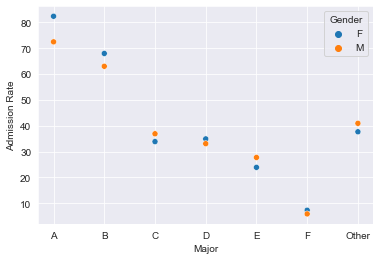

In [229]:
# your code
gender_major_acceptance_df = pd.DataFrame(data= {'Gender':[], 'Major':[], 'Admission Rate':[], 'Num of Applicants':[]})

for major in data['Major'].unique():
    for gender in data['Gender'].unique():
        specific_data = data[(data['Gender'] == gender) & (data['Major'] == major)]
        num_applicants = specific_data.shape[0]
        num_accepted = specific_data[specific_data['Admission'] == 'Accepted'].shape[0]
        admission_rate = num_accepted /num_applicants
        new_row = {'Gender': gender, 'Major': major, 'Num of Applicants': num_applicants, 'Admission Rate': admission_rate*100}
        gender_major_acceptance_df = gender_major_acceptance_df.append(new_row, ignore_index=True)

# Re-ordering the column order for the plot
gender_major_acceptance_df = gender_major_acceptance_df.sort_values(by='Major')
display(gender_major_acceptance_df)

sns.scatterplot(data=gender_major_acceptance_df, x='Major', y='Admission Rate', hue='Gender')


**Your answer:**

TODO

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:**

From what can be seen from the data, it seems that there is a Simpson Paradox present in this scenario. while overall men have higher admission rate then women (~44% compared to ~34%), when we look at the data considering the major combination as well, we can see that in majors: A, B, D, F (4 out of 7 groups) female have higher acceptance rate then males. The paradox is "created" because by what this data indicates, more men tend to choose majors with high acceptance rate (Such as major A,  which has the highest acceptance rate, and has 1138 male applicants compared to only 108 female). Thus contributing to the high acceptance rate for the men.

## Question 7: Big Data (15pts)

In [230]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:**

**For Streaming Data** : \
As we cannot store streaming data, we need to immediately use the information that we receive. Further, with continuous influx of data, we need to discard old data to make space for new data (due to limited capacity). In such a scenario, using recursive formalization is the only feasible option. For example, in the problem described above, we cannot store all the runtime values, but we can recursively integrate them to $\mu_n$ , so that we can discard that runtime value and move on to the next one. In such recursive formulation, the mean can be updated as new data points are received, rather than having to wait until all data points have been collected before computing the mean.

**Distributed Data** : \
For distributed data, we get a mean value from each node, since the means are calculated for each block of data separately in each node. We then combine the mean values using recursive formatting. Without this, we would have to fetch all the runtime values from each block and calculate mean overall, which negates the very need of using distributed systems.

### b) Set up MapReduce (10pts)


Realize the computation of the mean execution times of activities as a MapReduce job.
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**

**For Mapper 1-** \
$K_1$ : *Case* \
$V_1$ : [ *Activity* , *Timestamp* , *Lifecycle Transition* , *Execution ID*]

$K_2$ : *Execution ID* \
$V_2$ : [ *Activity* , *Timestamp* , *Lifecycle Transition* ]

**For Reducer 1-** \
$K_2$ : *Execution ID* \
$V_2$ : [ *Activity* , *Timestamp* , *Lifecycle Transition* ] \
$V_3$ : [ *Activity* , *Execution Time* ] \
where *Execution Time* = (*Timestamp* for *Lifecycle Transition* = *complete*) - (*Timestamp* for *Lifecycle Transition* = *start*) for each unique value in *Activity*

**For Mapper 2-** \
$K_1$ : *Activity* \
$V_1$ : *Execution Time*

$K_2$ : *Activity* \
$V_2$ : *Execution Time*

**For Reducer 2-** \
$K_2$ : *Activity* \
$V_2$ : *Execution Time*  \
$V_3$ : [ *Mean Execution Time* ] \
where, *Mean Execution Time* = sum(*Execution Time*)/*freq* \
such that *freq* is the count of the corresponding activity.

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [ ]:
# your code (nasa_mapper1.py)

"""nasa_mapper1.py"""
import sys
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    m = line.strip().split()
    key = m[3]
    value = [m[0],m[1],m[2]]
    value = '-'.join(value)
    print('{}\t{}'.format(key, value))

    # print('%s\t%s')

In [ ]:
# your code (nasa_reducer1.py)
"""nasa_reducer1.py"""

import sys

current_id = None
current_time1 = 0
current_time2 = 0
activity = None
exec_id = None

for line in sys.stdin:
    line = line.strip()
    exec_id, temp = line.split('\t', 1)
    activity, timestamp, lifecycle = temp.split('-', 2)
    timestamp = float(timestamp)
    if current_id != exec_id:
        current_id = exec_id
        current_time1 = timestamp
    else:
        if lifecycle == 'complete':
            current_time2 = timestamp
        else:
            # In this scenario the finished time was received before start time
            current_time2 = current_time1
            current_time1 = timestamp
        execution_time = current_time2 - current_time1
        print('{}\t{}'.format(activity, str(execution_time)))


In [ ]:
# your code (nasa_mapper2.py)
"""nasa_mapper2.py"""
import sys
for line in sys.stdin:
    # remove leading and trailing whitespace
    m = line.strip().split()
    print('{}\t{}'.format(m[0],m[1]))

In [ ]:
# your code (nasa_reducer2.py)

"""nasa_reducer2.py"""

import sys

current_activity = None
current_sum = 0
current_count = 1

for line in sys.stdin:
    line = line.strip()
    activity, exec_time = line.split('\t', 1)
    exec_time = float(exec_time)
    if current_activity != activity:
        if current_activity:
            mean_exec = current_sum/current_count
            print('{}\t{}\t{}'.format(current_activity, mean_exec, current_count))
        current_activity = activity
        current_sum = exec_time
        current_count = 1
    else:
        current_sum = current_sum + exec_time
        current_count = current_count + 1

if current_activity == activity:
    print('{}\t{}\t{}'.format(current_activity, mean_exec, current_count))

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [5]:
# your matriculation number here
matr_nb = 396222

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/396222-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/396222-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

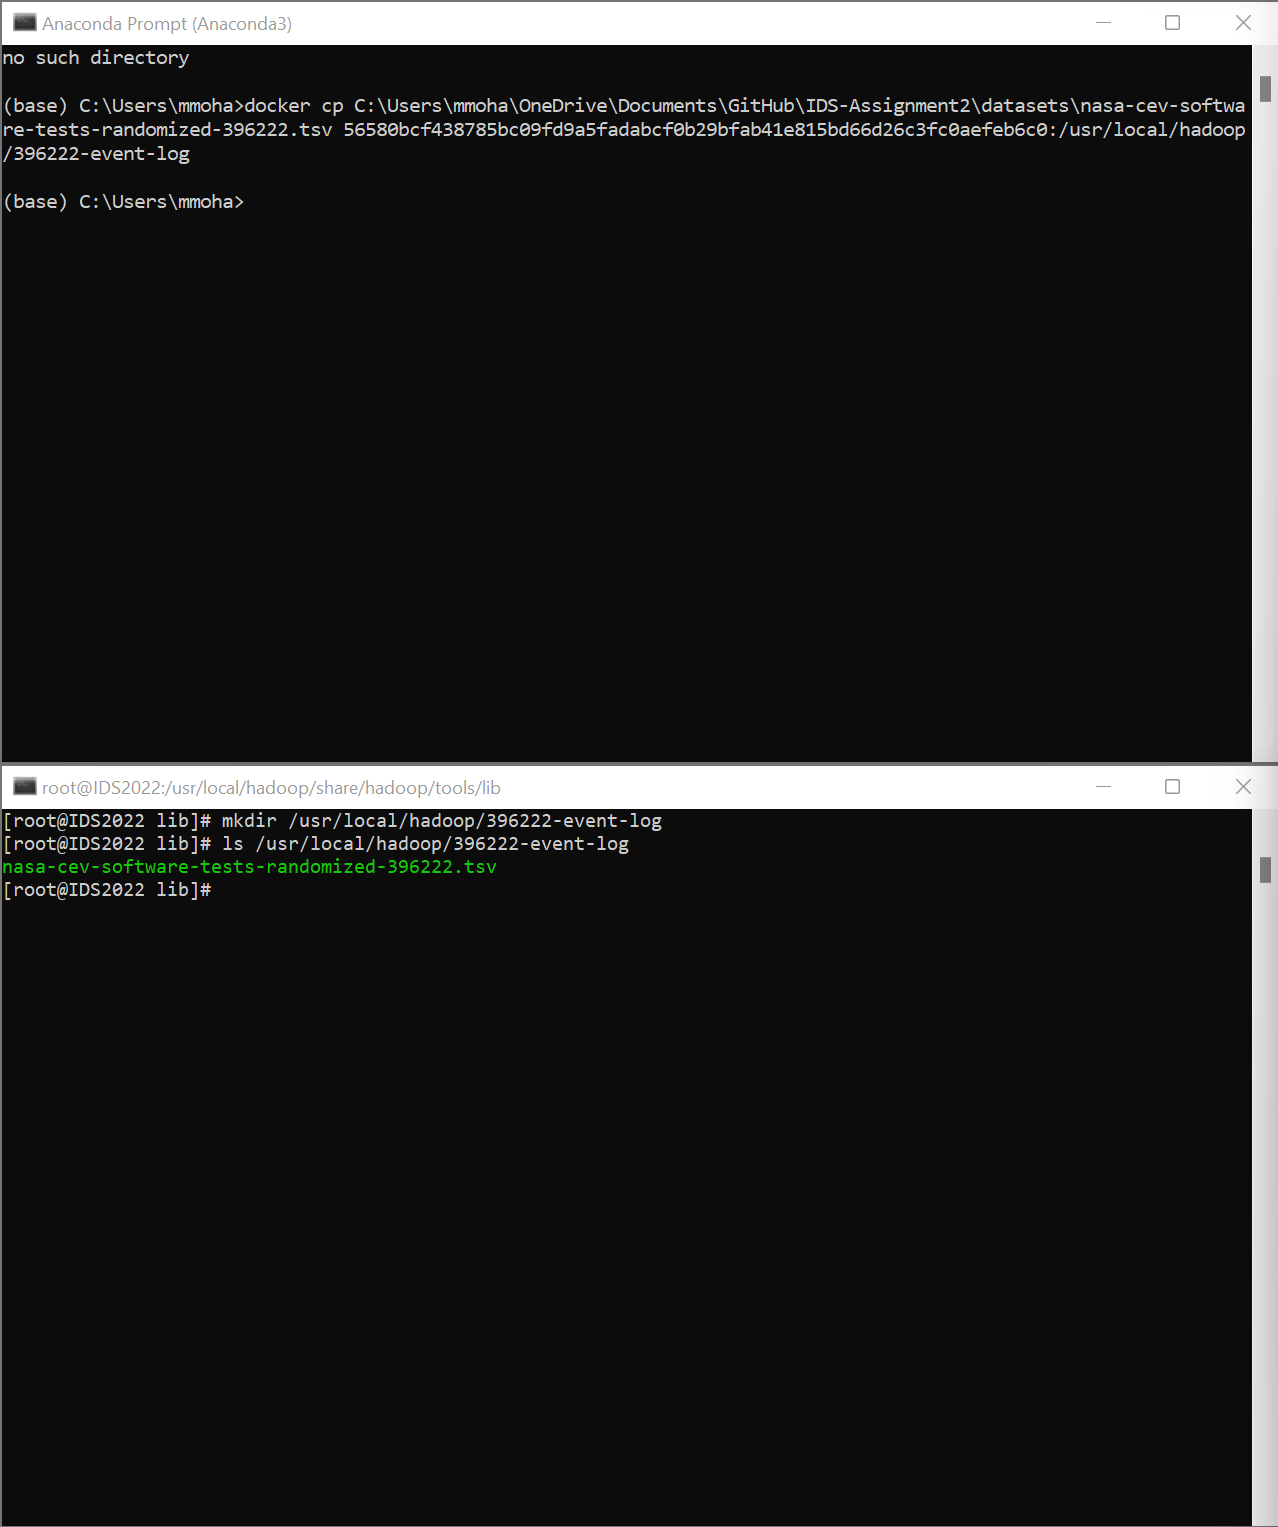

In [11]:
from IPython.display import Image
# your code
Image(filename='datasets/Q7_a1.png')

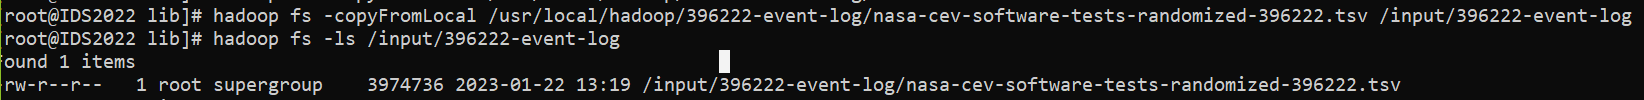

In [12]:
# your code
Image(filename='datasets/Q7_a2.png')

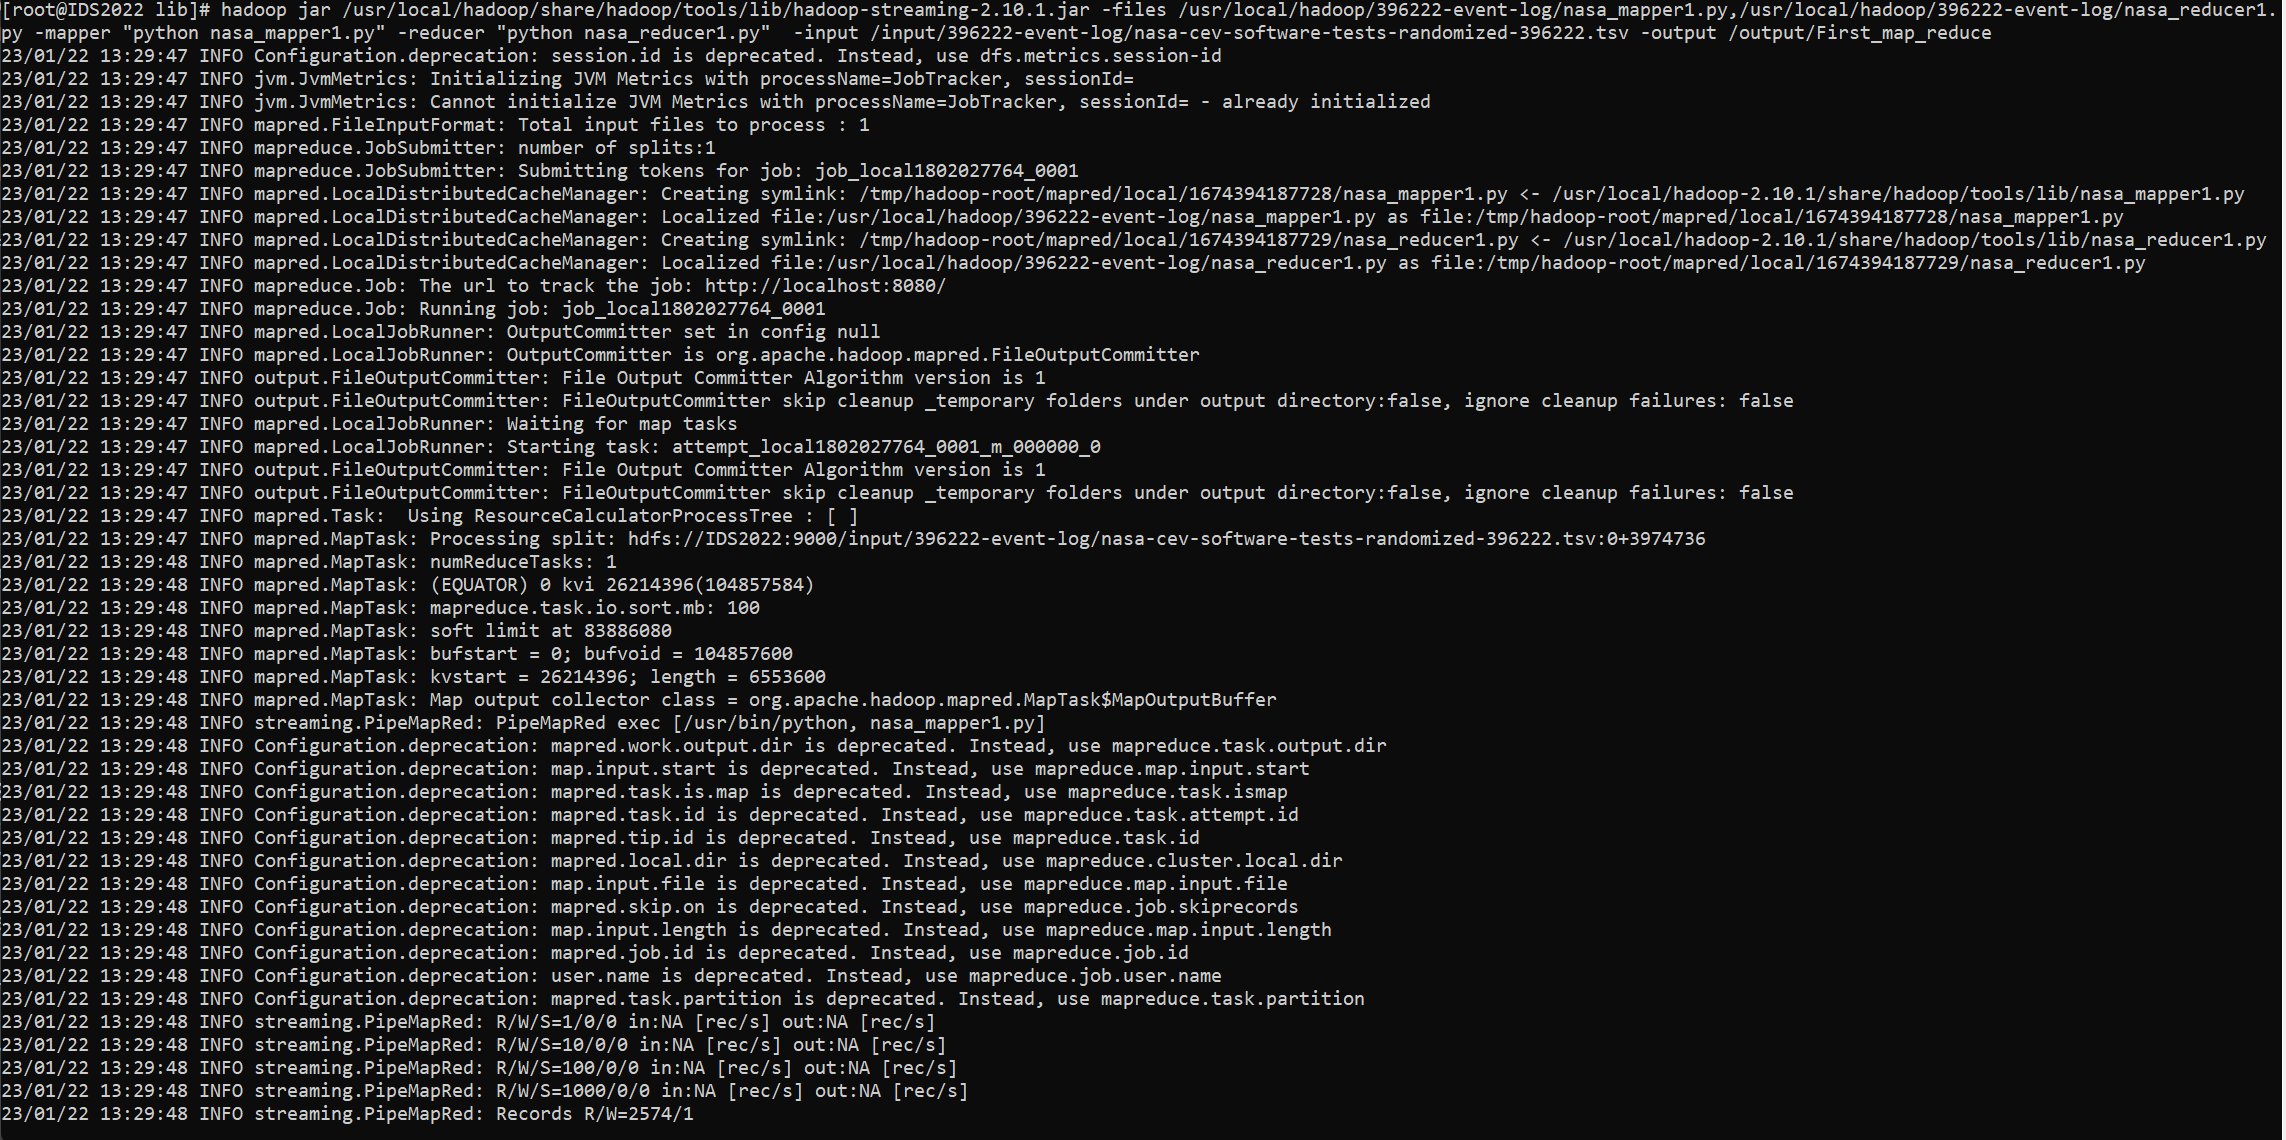

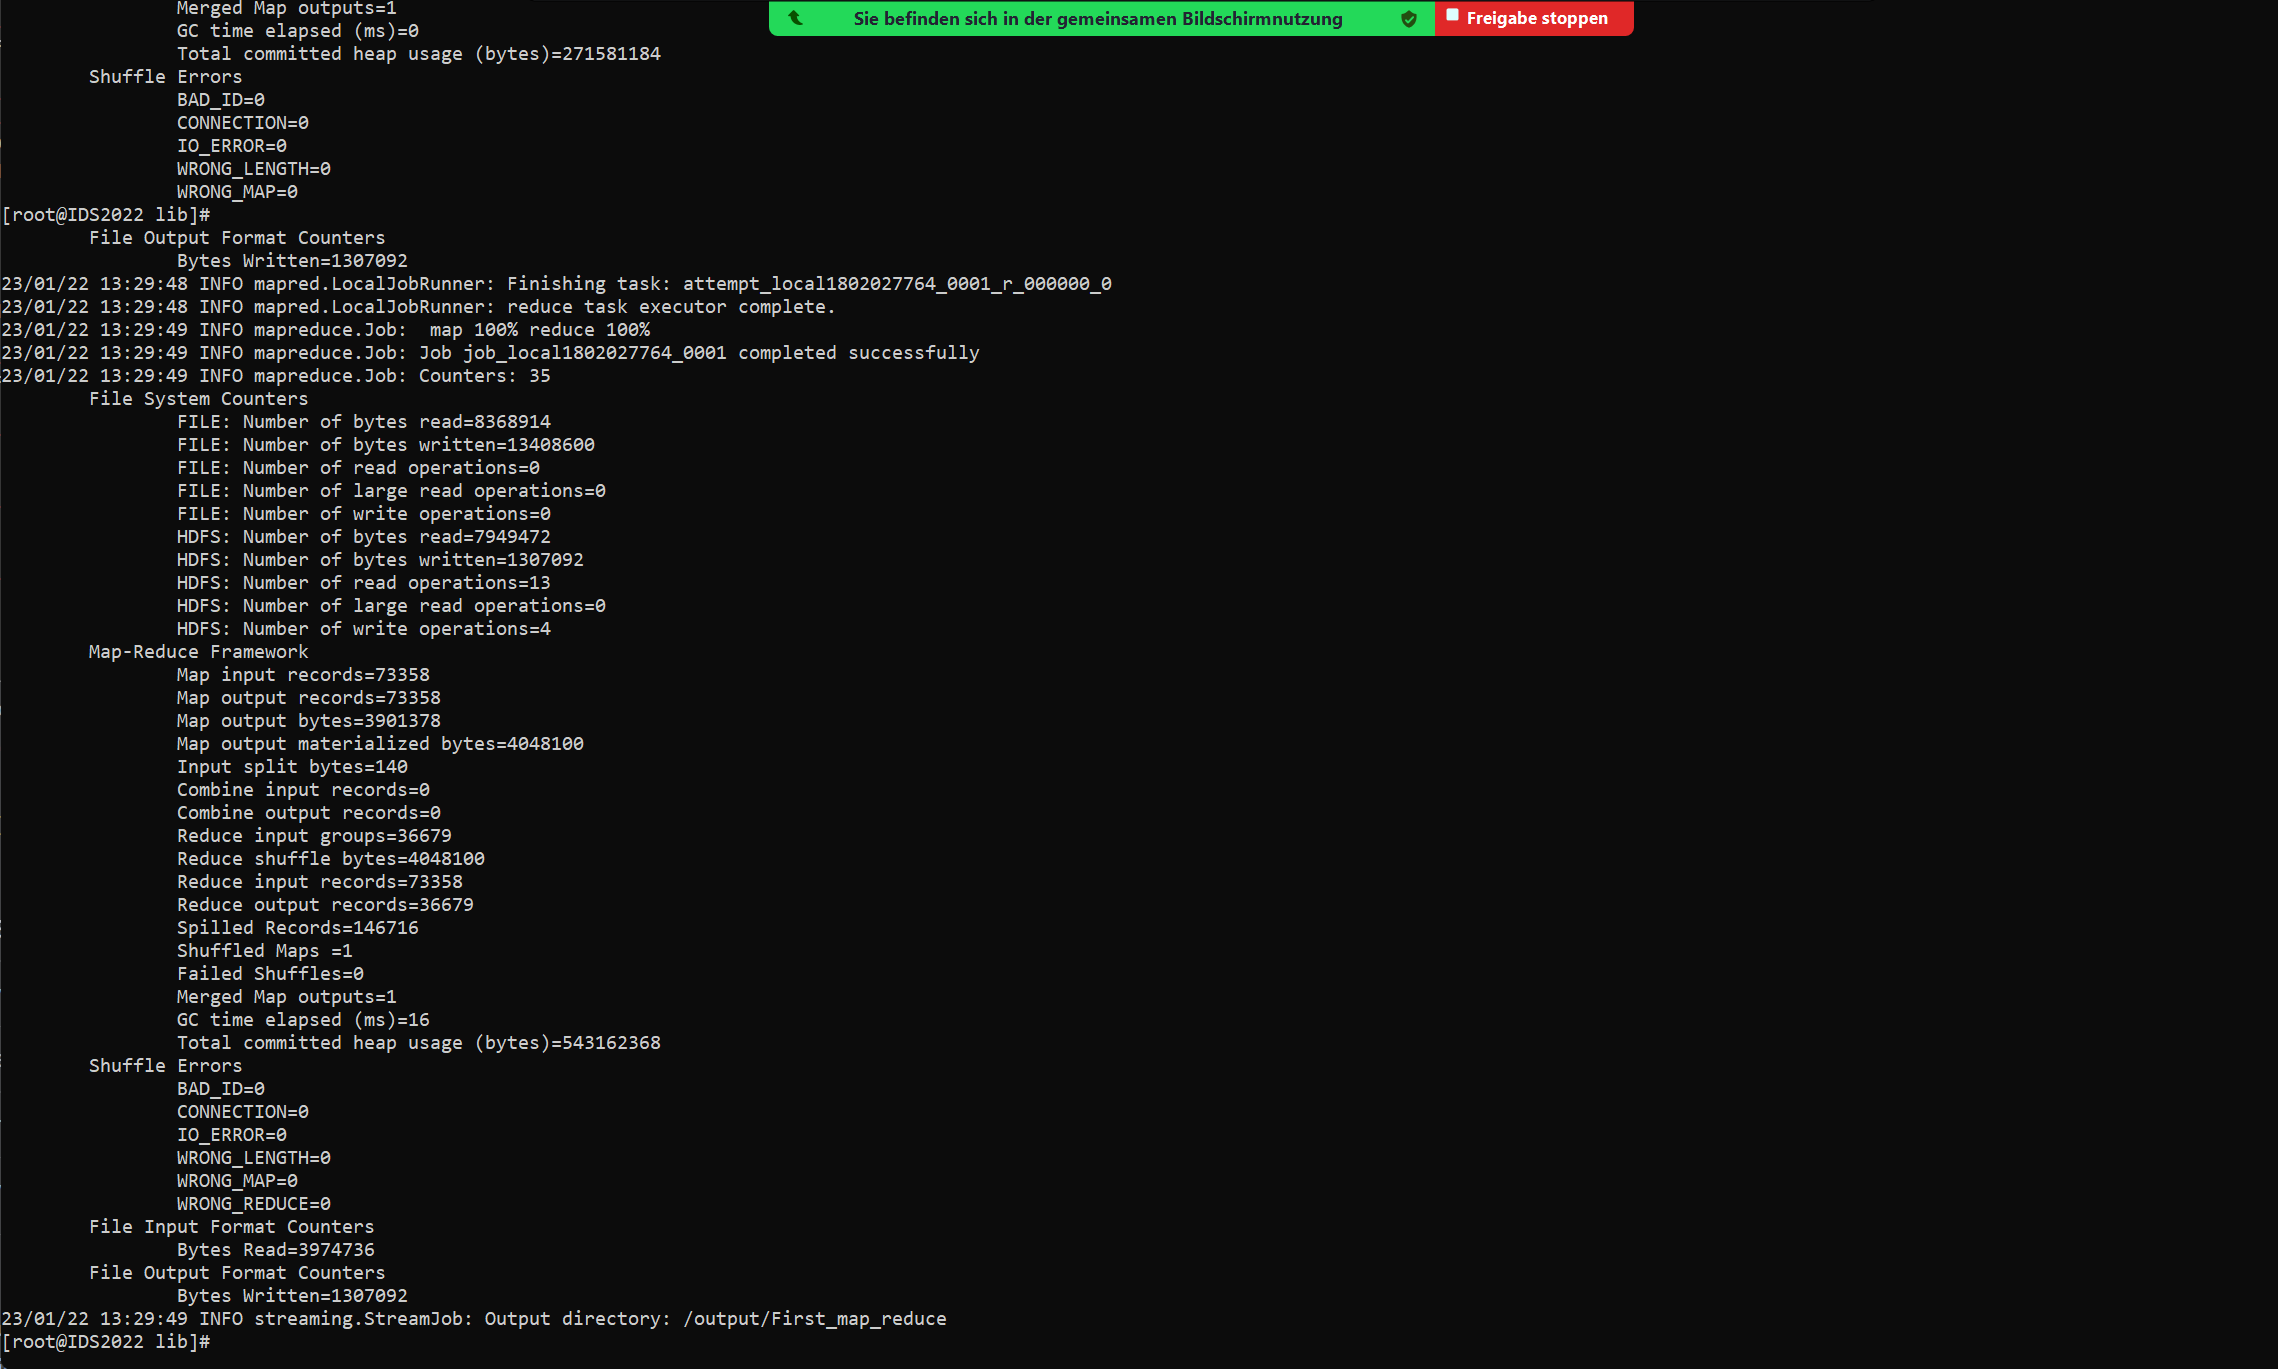

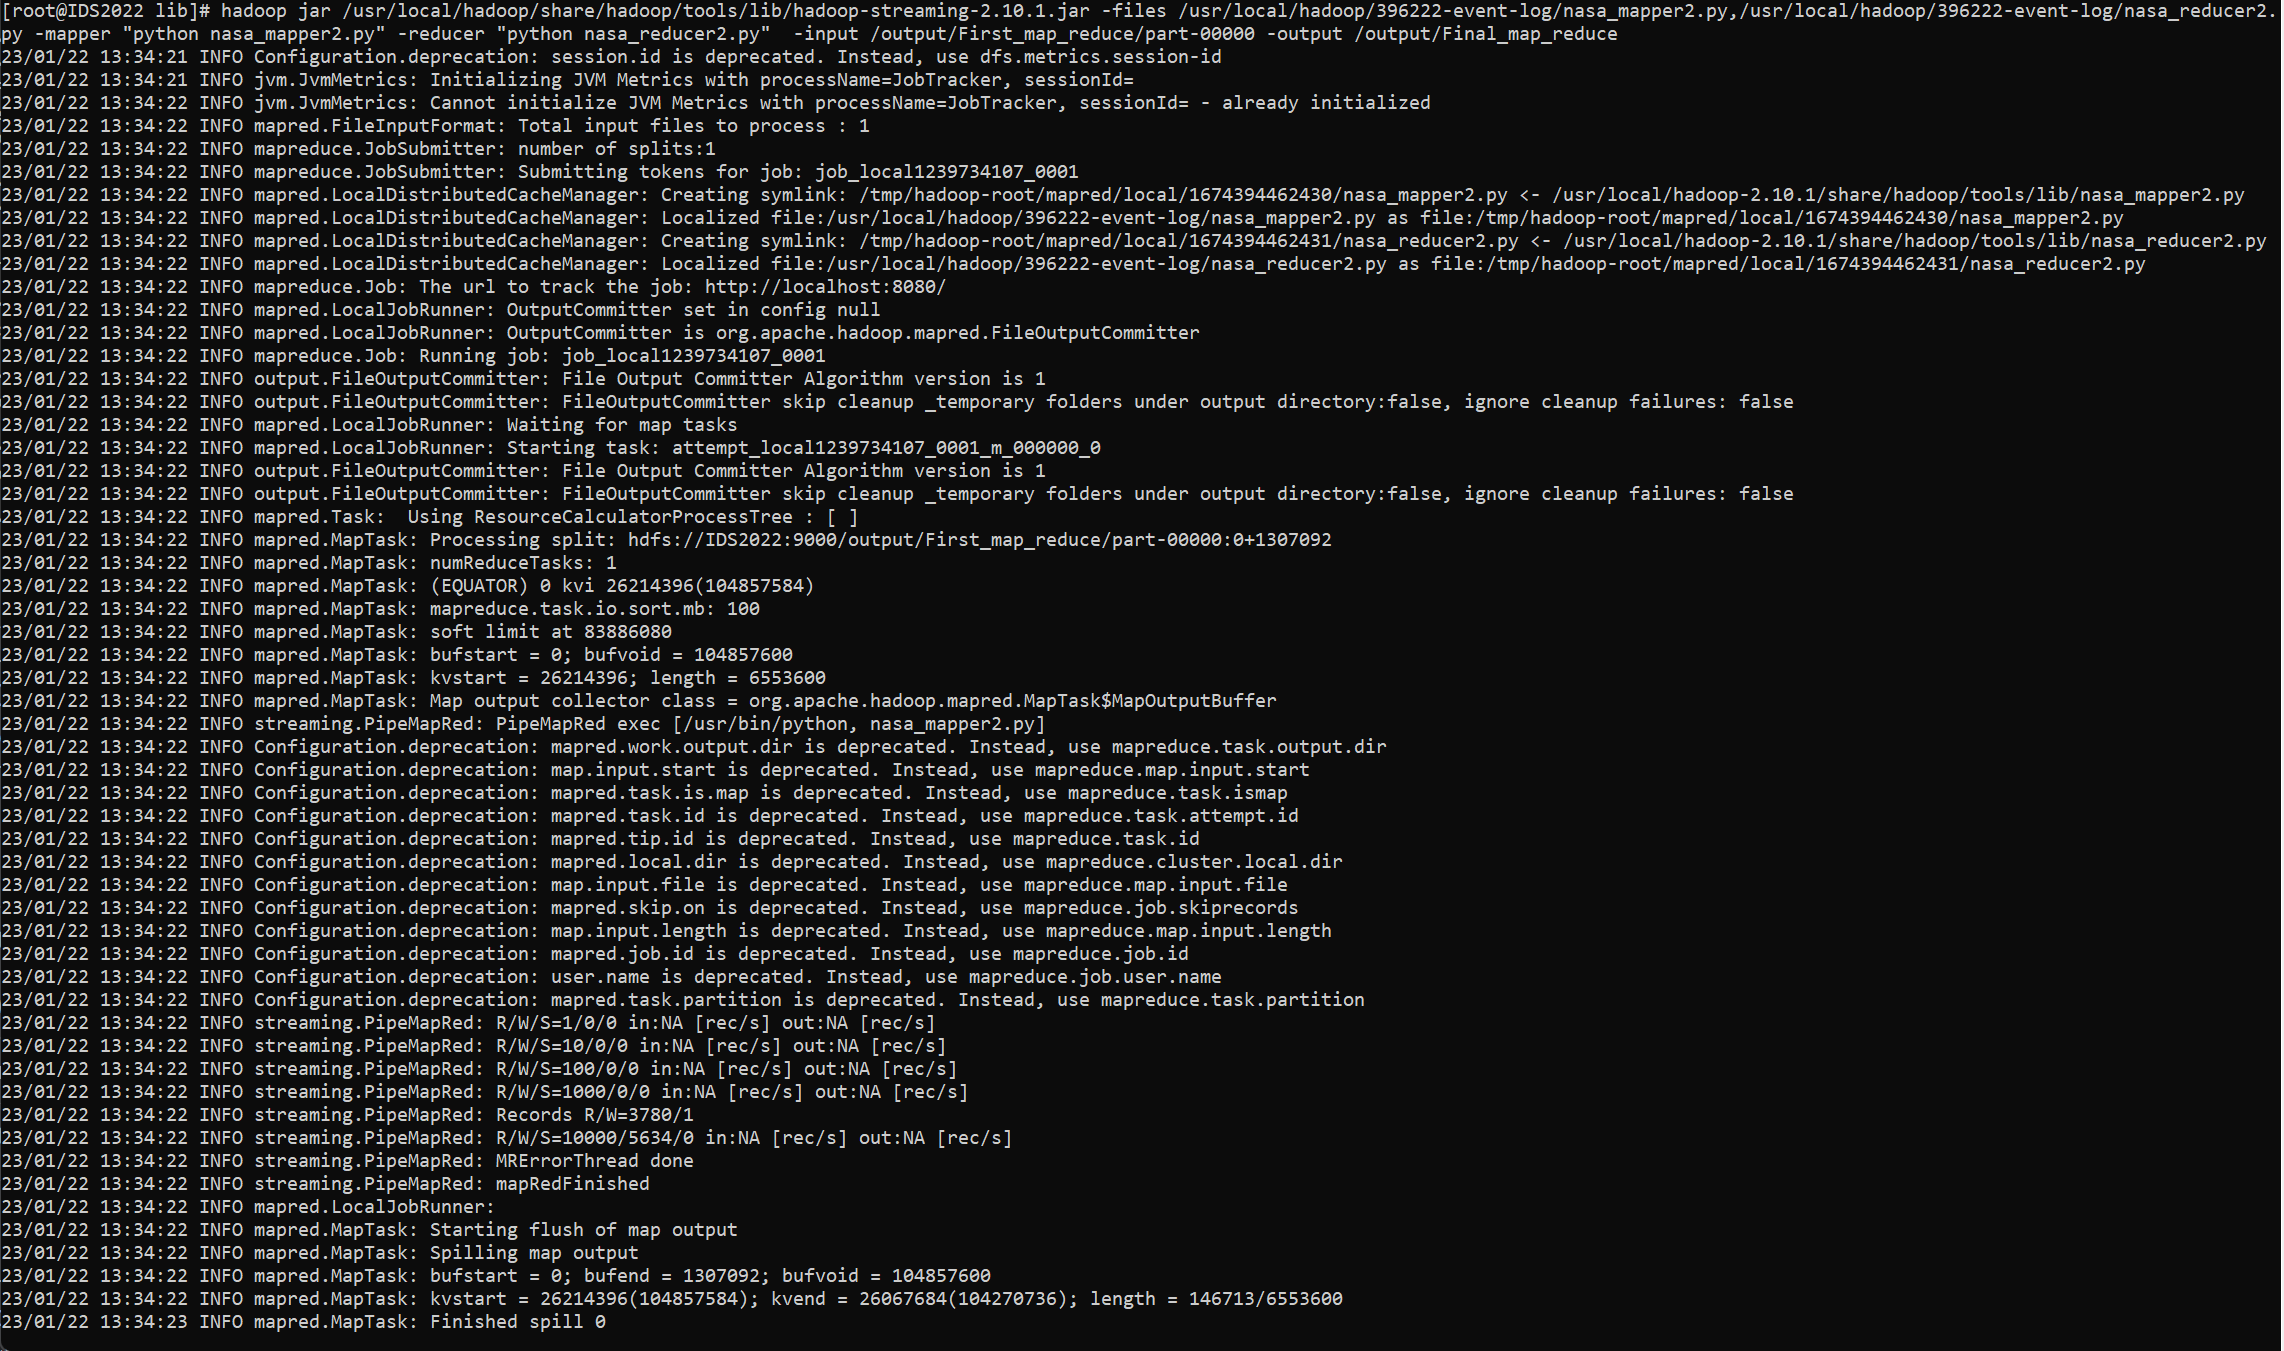

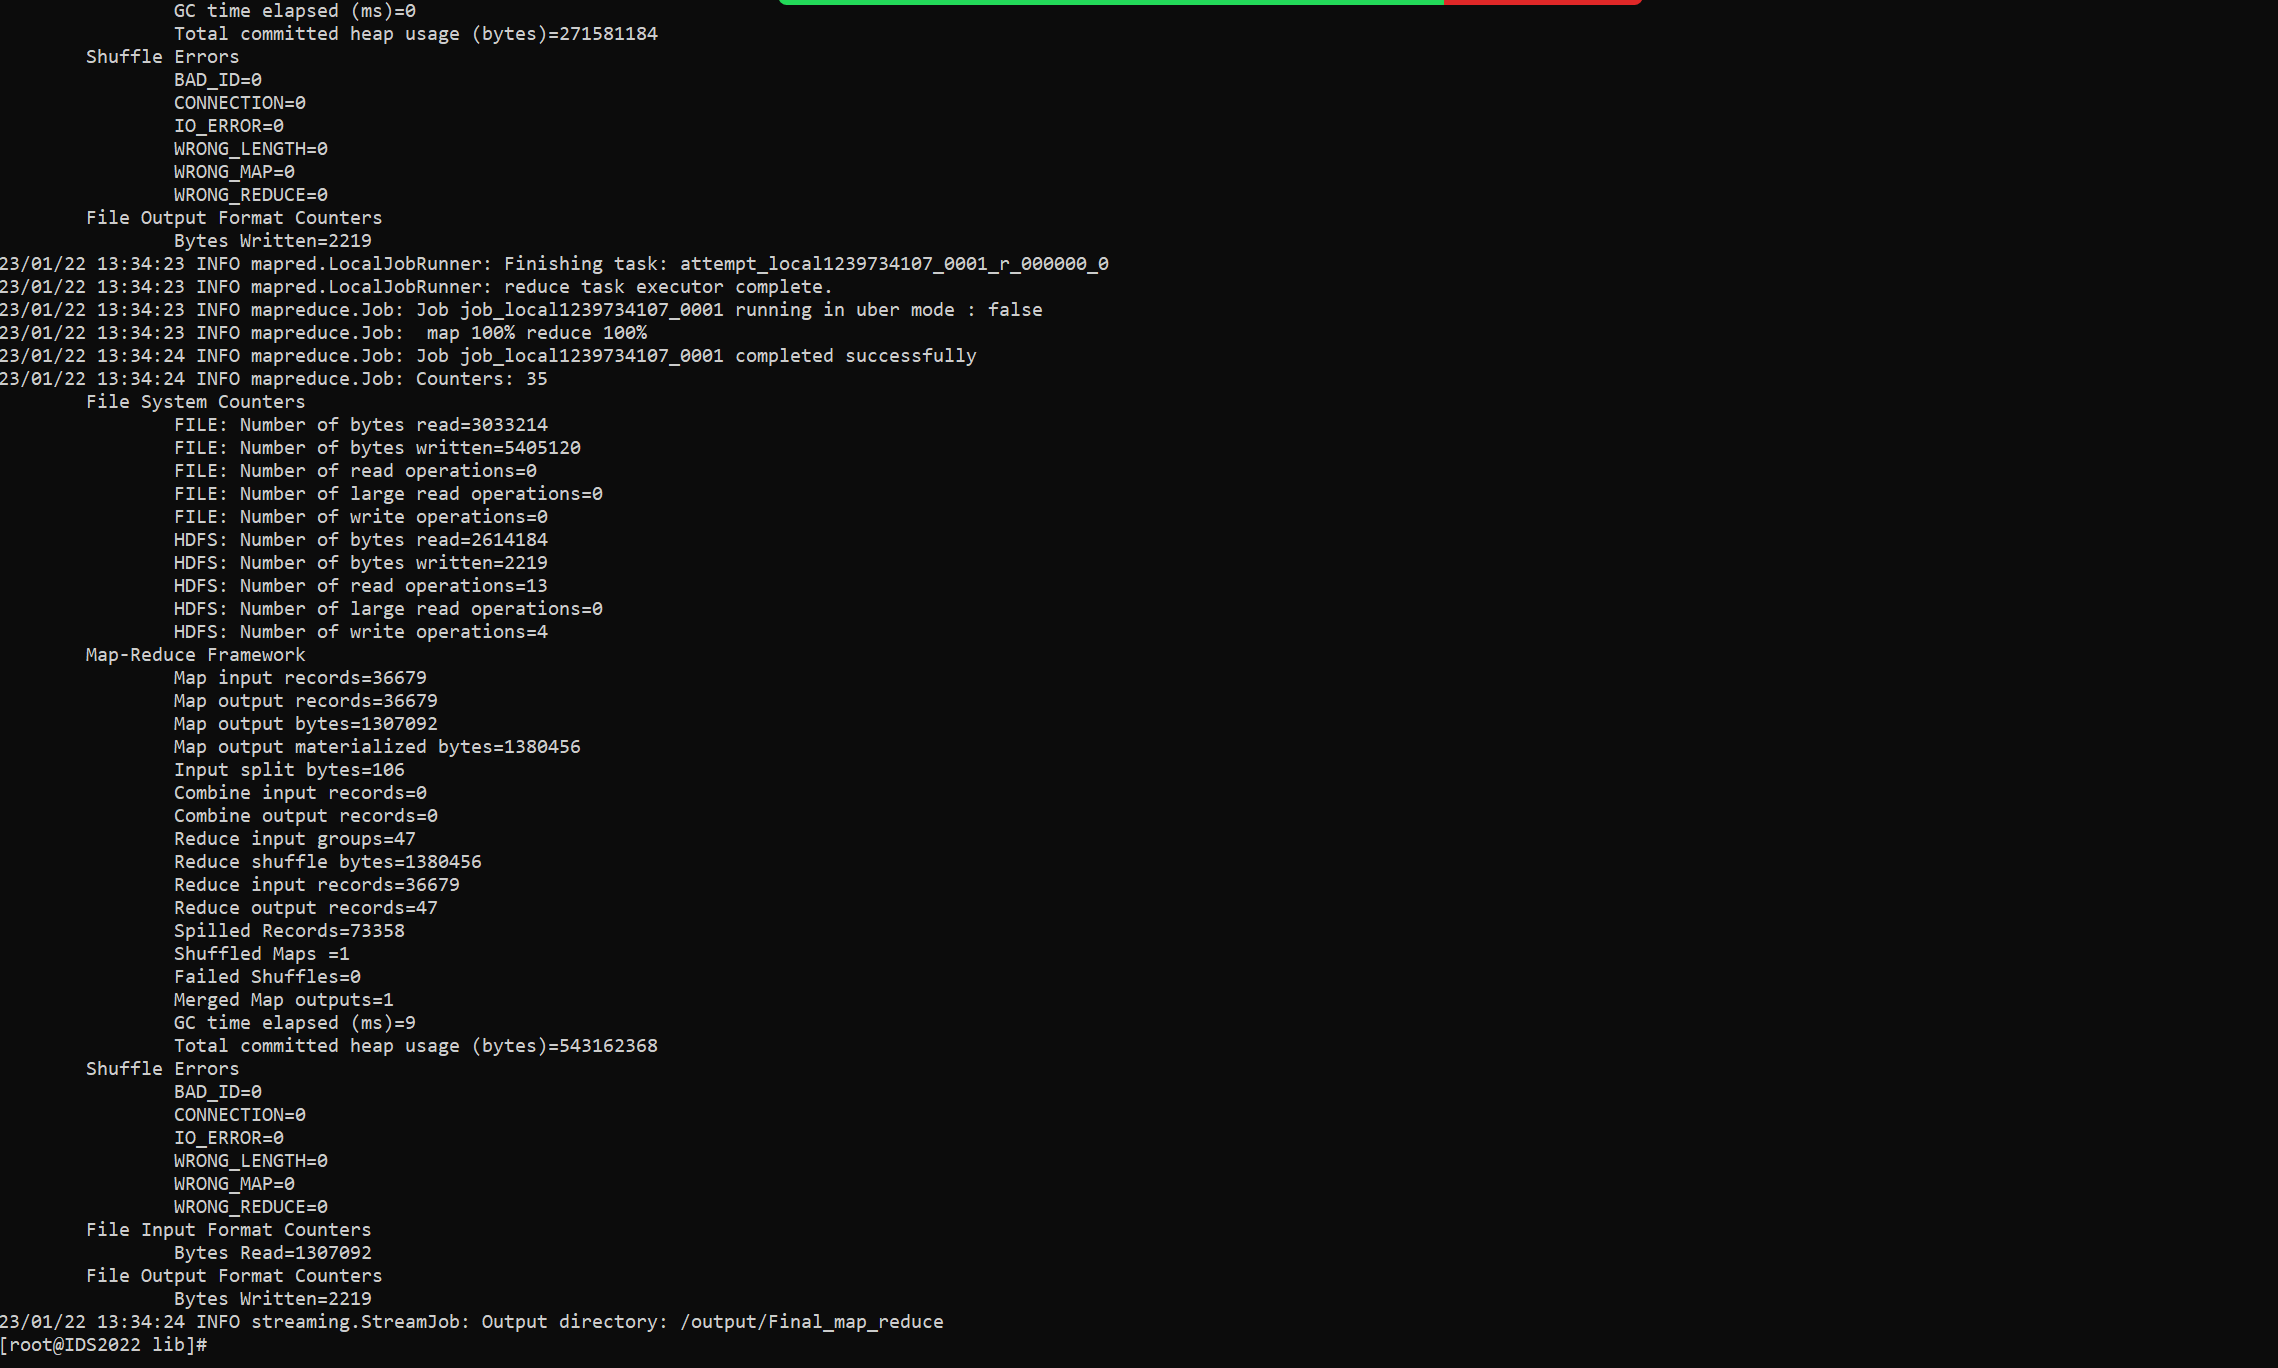

In [14]:
# your code
# First map reduce
display(Image(filename='datasets/Q7_a3_1_beginning.png'))
display(Image(filename='datasets/Q7_a3_1_end.png'))

#Second map reduce
display(Image(filename='datasets/Q7_a3_2_beginning.png'))
display(Image(filename='datasets/Q7_a3_2_end.png'))

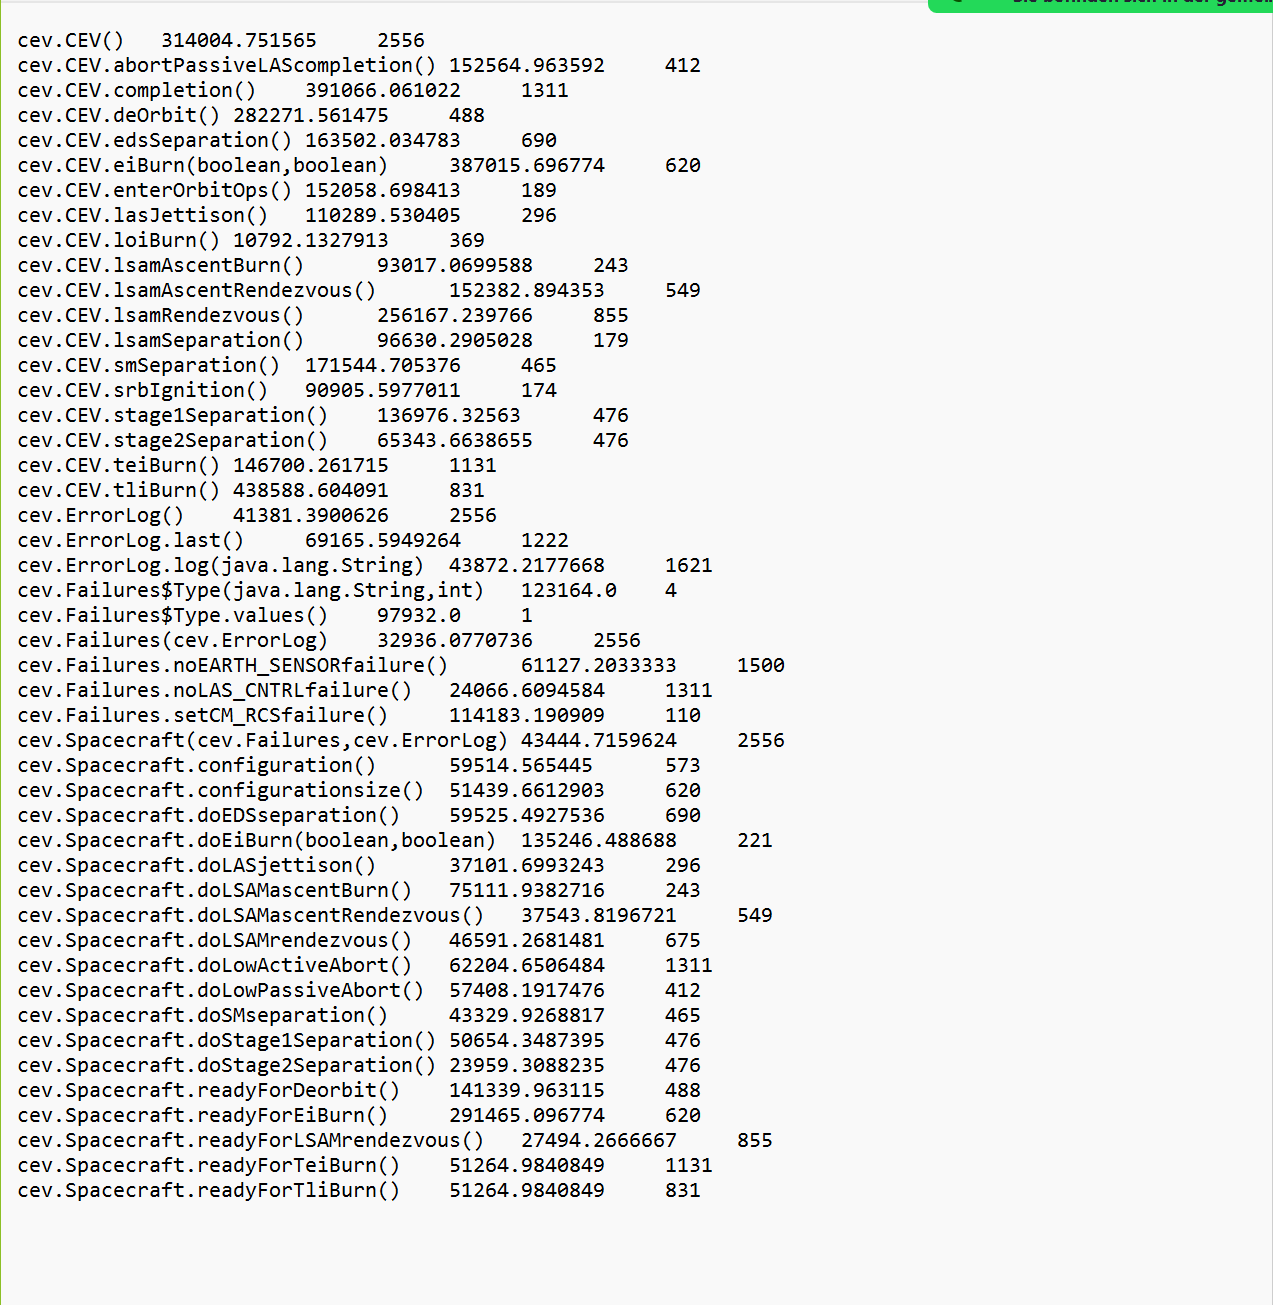

In [15]:
# your code
Image(filename='datasets/Q7_a4.png')
